# <center> <b>Principals of Data Science Assessment (6G7V0026)</b></center>

## <center><b>AutoTrader's Car Price Associator</b></center>

For this assessment project, a Car Sale Adverts dataset provided is by AutoTrader, one of MMU's industry partners. The dataset contains an anonymised collection of adverts with information on vehicles such as brand, type, colour, mileage, as well as the selling price. Additionally, it is asked to perform a set of tasks with the ultimate goal of learning about associations and group differences that have a discernible effect on the valuation of vehicles.

Specifically, these questions will be answered:

1. What are the best predictors of the price of a vehicle? In other words, what are the features
(individually or jointly) that seem to have to strongest association with the feature price, and
what are the explanations and insights behind those findings?

2. What are interesting groupings of the data, involving one or more features, that show
significant differences (e.g., trends, averages) in price? What can we learn from them and
how useful could these findings be for the business?


## <b>1. Data/Domain Understanding and Exploration</b>

### a. Importing the Relevant Libraries and Dataset

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset
df = pd.read_csv('../Dataset/adverts.csv')

### b. Sampling the Observations

In [3]:
# Extracting the 5 top rows in the dataset
df.head(5)

public_reference   mileage reg_code standard_colour standard_make  \
0   202006039777689       0.0      NaN            Grey         Volvo   
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   

      standard_model vehicle_condition  year_of_registration  price  \
0               XC90               NEW                   NaN  73970   
1                 XF              USED                2011.0   7000   
2               Yeti              USED                2017.0  14000   
3              Mokka              USED                2016.0   7995   
4  Range Rover Sport              USED                2015.0  26995   

   body_type  crossover_car_and_van              fuel_type  
0        SUV                  False  Petrol Plug-in Hybrid  
1     Saloon                  False                 Diesel  
2        SUV                  False                 Petrol  
3  Hatchback                  False                 Diesel  
4        SUV                  False                 Diesel

In [4]:
# Extracting a random sample of the dataset
df.sample(5)

public_reference   mileage reg_code standard_colour standard_make  \
45210    202010245397302   15500.0       18            Grey          Audi   
91674    202010104828568   15550.0       17            Grey      Vauxhall   
351726   202009183882708   27883.0       68            Grey           BMW   
180436   202010285529317  121000.0       55          Silver         Mazda   
357414   202005299625846   29943.0       06             NaN   Lamborghini   

       standard_model vehicle_condition  year_of_registration  price  \
45210              Q2              USED                2018.0  24500   
91674           Corsa              USED                2017.0   7495   
351726       5 Series              USED                2018.0  22675   
180436         Mazda3              USED                2005.0    800   
357414       Gallardo              USED                2006.0  76495   

          body_type  crossover_car_and_van fuel_type  
45210           SUV                  False    Petrol  
91674     Hatchback                  False    Petrol  
351726       Saloon                  False    Petrol  
180436    Hatchback                  False    Petrol  
357414  Convertible                  False    Petrol

In [5]:
# Extracting the last 5 rows of the dataset
df.tail(5)

public_reference   mileage reg_code standard_colour standard_make  \
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

       standard_model vehicle_condition  year_of_registration  price  \
402000            208              USED                2019.0  10595   
402001            107              USED                2009.0   2000   
402002        Qashqai              USED                2012.0   7250   
402003            595              USED                2015.0  11490   
402004       A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van fuel_type  
402000  Hatchback                  False    Petrol  
402001  Hatchback                  False    Petrol  
402002        SUV                  False    Petrol  
402003  Hatchback                  False    Petrol  
402004     Estate                  False    Diesel

In [6]:
# Checking for size and shape of the dataset
print("Size of the Dataset is: ", df.size)
print("Shape of the Dataset is: ", df.shape)

Size of the Dataset is:  4824060
Shape of the Dataset is:  (402005, 12)


<b> Observation(s):</b>

* No issue while importing the dataset and sampling the data.
* There are 402,005 rows in the dataset along with 12 columns / features.

### c. Checking for Correct Parsing of Data

In [7]:
# Types of data in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB


<table>
    <thead>
        <tr>
            <th>Data Attribute</th>
            <th>Value</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Public Reference</td>
            <td>Date on which the advertisment was published</td>
        </tr>
        <tr>
            <td>Mileage</td>
            <td>Total mileage of the cars</td>
        </tr>
        <tr>
            <td>Reg Code</td>
            <td>Regisration code of the car</td>
        </tr>
        <tr>
            <td>Standard Colour</td>
            <td>Colour of the car</td>
        </tr>
        <tr>
            <td>Standard Make</td>
            <td>Make / Manufacturer of the car</td>
        </tr>
        <tr>
            <td>Standard Model</td>
            <td>Model of the car</td>
        </tr>
        <tr>
            <td>Vehicle Condition</td>
            <td>Condition of the car</td>
        </tr>
        <tr>
            <td>Year of Registration</td>
            <td>Year on which the vehicle was registered</td>
        </tr>
        <tr>
            <td>Price</td>
            <td>Quoted price of the car</td>
        </tr>
        <tr>
            <td>Body Type</td>
            <td>Body type of the car</td>
        </tr>
        <tr>
            <td>Crossover Car and Van</td>
            <td>whether it is a crossover b/w car and van or not</td>
        </tr>
        <tr>
            <td>Fuel Type</td>
            <td>Fuel type of the vehicle</td>
        </tr>
    </tbody>
</table>

<b> Observation(s): </b>

* Although almost all of the column's datatypes seems to be correct, but the `year_of_registration` column's data type should be changed because it cannot be in float.
* `reg_code` should be inspected whether it needs a datatype change or not. It will be checked whether it has string or just numerical values.

In [9]:
# Descriptive Statistics for columns in the dataset
df.describe(include='all')

public_reference        mileage reg_code standard_colour  \
count       4.020050e+05  401878.000000   370148          396627   
unique               NaN            NaN       72              22   
top                  NaN            NaN       17           Black   
freq                 NaN            NaN    36738           86287   
mean        2.020071e+14   37743.595656      NaN             NaN   
std         1.691662e+10   34831.724018      NaN             NaN   
min         2.013072e+14       0.000000      NaN             NaN   
25%         2.020090e+14   10481.000000      NaN             NaN   
50%         2.020093e+14   28629.500000      NaN             NaN   
75%         2.020102e+14   56875.750000      NaN             NaN   
max         2.020110e+14  999999.000000      NaN             NaN   

       standard_make standard_model vehicle_condition  year_of_registration  \
count         402005         402005            402005         368694.000000   
unique           110           1168                 2                   NaN   
top              BMW           Golf              USED                   NaN   
freq           37376          11583            370756                   NaN   
mean             NaN            NaN               NaN           2015.006206   
std              NaN            NaN               NaN              7.962667   
min              NaN            NaN               NaN            999.000000   
25%              NaN            NaN               NaN           2013.000000   
50%              NaN            NaN               NaN           2016.000000   
75%              NaN            NaN               NaN           2018.000000   
max              NaN            NaN               NaN           2020.000000   

               price  body_type crossover_car_and_van fuel_type  
count   4.020050e+05     401168                402005    401404  
unique           NaN         16                     2         9  
top              NaN  Hatchback                 False    Petrol  
freq             NaN     167315                400210    216929  
mean    1.734197e+04        NaN                   NaN       NaN  
std     4.643746e+04        NaN                   NaN       NaN  
min     1.200000e+02        NaN                   NaN       NaN  
25%     7.495000e+03        NaN                   NaN       NaN  
50%     1.260000e+04        NaN                   NaN       NaN  
75%     2.000000e+04        NaN                   NaN       NaN  
max     9.999999e+06        NaN                   NaN       NaN

<b>Observation(s):</b>

* At the initial phase, it can be easily observed that there might be error values in the `mileage` max column (999999.000000), `year_of_registration` min column (999.000000), and `price` max column (9.999999e+06). 

### d. Categorical Columns' Unique Value Assessment

In [10]:
# Consistency checks for the standard_colour column by looking out for all the unique values 
standard_colour = df['standard_colour'].unique().tolist()
sort_standard_colour = np.sort(standard_colour)
print(sort_standard_colour)

['Beige' 'Black' 'Blue' 'Bronze' 'Brown' 'Burgundy' 'Gold' 'Green' 'Grey'
 'Indigo' 'Magenta' 'Maroon' 'Multicolour' 'Navy' 'Orange' 'Pink' 'Purple'
 'Red' 'Silver' 'Turquoise' 'White' 'Yellow' 'nan']


In [11]:
# Consistency checks for the standard_make column by looking out for all the unique values 
standard_make = df['standard_make'].unique().tolist()
sort_standard_make = np.sort(standard_make)
print(sort_standard_make)

['AC' 'AK' 'Abarth' 'Aixam' 'Alfa Romeo' 'Alpine' 'Ariel' 'Aston Martin'
 'Audi' 'Austin' 'BAC' 'BMW' 'Beauford' 'Bentley' 'Bristol' 'Bugatti'
 'Buick' 'CUPRA' 'Cadillac' 'Carbodies' 'Caterham' 'Chevrolet' 'Chrysler'
 'Citroen' 'Corvette' 'Custom Vehicle' 'DS AUTOMOBILES' 'Dacia' 'Daewoo'
 'Daihatsu' 'Daimler' 'Datsun' 'Dax' 'Dodge' 'Ferrari' 'Fiat' 'GMC'
 'Gentry' 'Great Wall' 'Holden' 'Honda' 'Hummer' 'Hyundai' 'Infiniti'
 'International' 'Isuzu' 'Iveco' 'Jaguar' 'Jeep' 'Jensen' 'Kia' 'LEVC'
 'Lamborghini' 'Lancia' 'Land Rover' 'Lexus' 'Leyland' 'Lincoln'
 'London Taxis International' 'Lotus' 'MG' 'MINI' 'Maserati' 'Maybach'
 'Mazda' 'McLaren' 'Mercedes-Benz' 'Mev' 'Mitsubishi' 'Mitsuoka' 'Morgan'
 'Morris' 'Nissan' 'Noble' 'Opel' 'Pagani' 'Panther' 'Perodua' 'Peugeot'
 'Pilgrim' 'Plymouth' 'Pontiac' 'Porsche' 'Proton' 'Radical' 'Reliant'
 'Renault' 'Replica' 'Rolls-Royce' 'Rover' 'SEAT' 'SKODA' 'Saab' 'Sebring'
 'Smart' 'SsangYong' 'Subaru' 'Suzuki' 'TVR' 'Tesla' 'Tiger' 'Toyota'
 '

In [12]:
# Consistency checks for the standard_model column by looking out for all the unique values 
standard_model = df['standard_model'].unique().tolist()
sort_standard_model = np.sort(standard_model)
print(sort_standard_model)

for model in sort_standard_model:
    print(model)


['1 Series' '10' '100' ... 'ix35' 'quattro' 'up!']
1 Series
10
100
1000
1007
106
107
108
11
110
122
124 Spider
126
127
12C
146
147
1500
156
159
159 Sportwagon
1600
164
19
190
190 SL
2 CV
2 Series
2 Series Active Tourer
2 Series Gran Coupe
2 Series Gran Tourer
200
2000
2008
205
206
206 CC
206 SW
207
207 CC
207 SW
208
220
222
230
230 SL
240
240Z
246
25
25/30
250
2500
260
275
280
3 Series
3 Series Gran Turismo
3 Wheeler
300
3000GT
3008
300C
306
307
307 CC
307 SW
308
308 CC
308 SW
310
320
3200
323
328
340R
348
350
350 Z
3500
350i
355 F1
356
360
365
370 Z
380
4 Series
4 Series Gran Coupe
4/4
400
4007
406
407
407 SW
420
4200
430
45
450
456
456M
458
480
488
488 Pista
4C
5
5 Series
5 Series Gran Turismo
500
5008
500C
500L
500X
508
508 SW
512
540C
550
560
560SL
57
570GT
570S
575M
595
595C
599
6 Series
6 Series Gran Coupe
6 Series Gran Turismo
6/110
600
600LT
607
612
62
626
650S
675LT
695
695C
7 Series
700
718 Boxster
718 Cayman
718 Spyder
720S
740
75
75 Tourer
8 Series
8 Series Gran Coupe
80
80

In [13]:
# Consistency checks for the vehicle_condition column by looking out for all the unique values 
vehicle_condition = df['vehicle_condition'].unique().tolist()
sort_vehicle_condition = np.sort(vehicle_condition)
print(sort_vehicle_condition)

['NEW' 'USED']


In [14]:
# Consistency checks for the body_type column by looking out for all the unique values 
body_type = df['body_type'].unique().tolist()
sort_body_type = np.sort(body_type)
print(sort_body_type)

['Camper' 'Car Derived Van' 'Chassis Cab' 'Combi Van' 'Convertible'
 'Coupe' 'Estate' 'Hatchback' 'Limousine' 'MPV' 'Minibus' 'Panel Van'
 'Pickup' 'SUV' 'Saloon' 'Window Van' 'nan']


In [15]:
# Consistency checks for the crossover_car_and_van column by looking out for all the unique values 
crossover_car_and_van = df['crossover_car_and_van'].unique().tolist()
sort_crossover_car_and_van = np.sort(crossover_car_and_van)
print(sort_crossover_car_and_van)

[False  True]


In [16]:
# Consistency checks for the fuel_type column by looking out for all the unique values 
fuel_type = df['fuel_type'].unique().tolist()
sort_fuel_type = np.sort(fuel_type)
print(sort_fuel_type)

['Bi Fuel' 'Diesel' 'Diesel Hybrid' 'Diesel Plug-in Hybrid' 'Electric'
 'Natural Gas' 'Petrol' 'Petrol Hybrid' 'Petrol Plug-in Hybrid' 'nan']


<b>Observation(s):</b>

* The consistency in the categorical columns seems to be fine in all the columns and haven't saw any inconsistencies. However, a plethora of NaN values exists which either should be removed or dealth with according to the importance of the columns.

### e. Quantitative Columns' Values Consistency Check:

In [17]:
# Checking for negative or extreme values in all numerical columns in the dataset
df.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

<b>Observation(s):</b>

* There are no negative values observations in any of the columns.

### f. Identify Quantitative and Qualitative Features

In [18]:
# Quantitative Features in the Dataset are:
quantitative_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Quantitative Features are: ", quantitative_features)

#Qualitative Features in the Dataset are:
qualitative_features = df.select_dtypes(include=['object']).columns.tolist()
print("Qualitative Features are: ", qualitative_features)


Quantitative Features are:  ['public_reference', 'mileage', 'year_of_registration', 'price']
Qualitative Features are:  ['reg_code', 'standard_colour', 'standard_make', 'standard_model', 'vehicle_condition', 'body_type', 'fuel_type']


### g. Analyse Data Distributions (e.g., range, centrality, dispersion, shape)

In [19]:
# For range of values in the dataset, we will use the describe function
df.describe()

public_reference        mileage  year_of_registration         price
count      4.020050e+05  401878.000000         368694.000000  4.020050e+05
mean       2.020071e+14   37743.595656           2015.006206  1.734197e+04
std        1.691662e+10   34831.724018              7.962667  4.643746e+04
min        2.013072e+14       0.000000            999.000000  1.200000e+02
25%        2.020090e+14   10481.000000           2013.000000  7.495000e+03
50%        2.020093e+14   28629.500000           2016.000000  1.260000e+04
75%        2.020102e+14   56875.750000           2018.000000  2.000000e+04
max        2.020110e+14  999999.000000           2020.000000  9.999999e+06

<b>Observation(s):</b>

* According to `public_reference`, earliest advertisment of car was posted on 2013 and the last was on 2020.
* `mileage` shows a variation of values with minimum value being 0.0 because most probably it denotes new car and 999999 shows error value.
* In the `year_of_registration` column, the minimum value is incorrect & it also denotes that most probably there are error values just above the minimum range.
* Regarding `price`, it doesn't reveal much except there should be error values near the maximum end of the values.

* Finally, Apart from the error / outlier values, the ranges in the column are in accordance with the context / nature of the columns and dataset.

In [20]:
# Although most of the statistical functions are available in the describe function, some more simple functions will be used to find out median and mode of the dataset
print("Median of the Quantitative Features: ", df[quantitative_features].median())

print("\n \nMode of the Qualitative Features: ", df[qualitative_features].mode())

Median of the Quantitative Features:  public_reference        2.020093e+14
mileage                 2.862950e+04
year_of_registration    2.016000e+03
price                   1.260000e+04
dtype: float64

 
Mode of the Qualitative Features:    reg_code standard_colour standard_make standard_model vehicle_condition  \
0       17           Black           BMW           Golf              USED   

   body_type fuel_type  
0  Hatchback    Petrol  


<b>Observation(s):</b>

* <b>Median</b> for the quantitative does not reveal much which should be mentioned except that the middle value of `mileage` is around 28k miles and 2016 is for `year_of_registration`.
* <b>Mode</b> of the qualitative dataset reveals some interesting features of most values in the columns: BMW is for `standard_make`, black is for `standard_colour`, used is for the `vehicle_condition`, hatchback is for `body_type`, and petrol is for `fuel_type`.

In [21]:
# For dispersion measures like include variance, standard deviation, and interquartile range (IQR), we will use the describe function:

print("Standard Deviation of the Quantitative Features: ", df[quantitative_features].std())

print("\n \nVariance of the Quantitative Features: ", df[quantitative_features].var())

print("\n \nInterquartile Range of the Quantitative Features: ", df[quantitative_features].quantile([0.25, 0.5, 0.75]))

Standard Deviation of the Quantitative Features:  public_reference        1.691662e+10
mileage                 3.483172e+04
year_of_registration    7.962667e+00
price                   4.643746e+04
dtype: float64

 
Variance of the Quantitative Features:  public_reference        2.861719e+20
mileage                 1.213249e+09
year_of_registration    6.340407e+01
price                   2.156438e+09
dtype: float64

 
Interquartile Range of the Quantitative Features:        public_reference   mileage  year_of_registration    price
0.25      2.020090e+14  10481.00                2013.0   7495.0
0.50      2.020093e+14  28629.50                2016.0  12600.0
0.75      2.020102e+14  56875.75                2018.0  20000.0


<b>Observation(s):</b>

* According to the data of Standard Deviation / variance, it can be analyzed that the `mileage` & `price` values are dispersed much more than the value of `year_of_registration`. It may be like this because the data pertaining to year of registration is majorly around thr 2000's era.
* As for the IQR, there are some key insights that were observed: The mileage around which most of the vehicle are around 28,000, most of the vehicles were put on for sale around 2016, and prices of most of the vehicles revolves around £12,000.

In [22]:
# For knowing the skewness of the quanitative, we will use the skew:
print("Skewness of the Quantitative Features: ", df[quantitative_features].skew())

Skewness of the Quantitative Features:  public_reference        -11.365289
mileage                   1.451132
year_of_registration    -87.909954
price                   154.681527
dtype: float64


<b>Obseration(s):</b>

Skewness shows the titlt of the majority of the values from the mean of the column: 
<ul>
<li>There isn't much of a variation of `mileage` values from the mean.</li>
<li>Large negative values in the `year_of_registration` shows that the majority values are on the right side and there are small number of values that extend that tail to the left.</li>
<li>Large positive value of `Price` indicates that the majority of the values are on the left side and there are fewer values that extend the tail to the right side.</li>
</ul>

### h. Value Distributions of Quantitative Columns

This section is just about getting detailed information along with values about the related columns for detailed analysis.

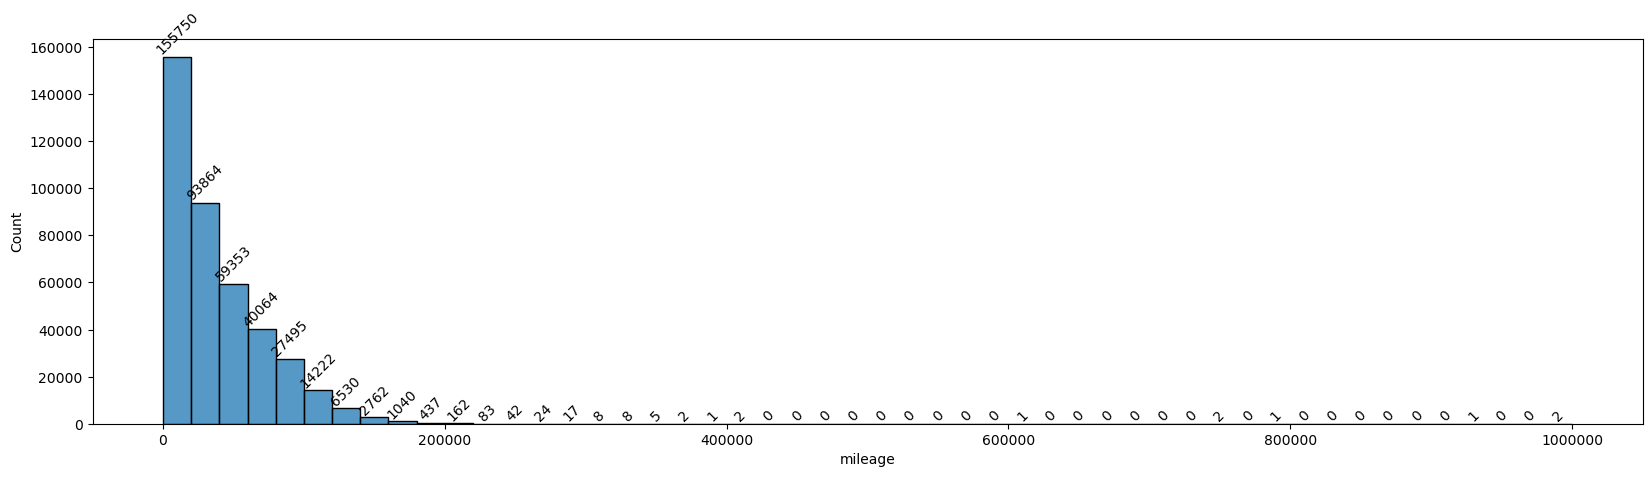

In [26]:
# Detailed Visualization the dispersion measures of mileage column via histogram
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.histplot(df['mileage'], bins=50, binrange=(0, 1000000))

# Labelling bars in the histogram
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()


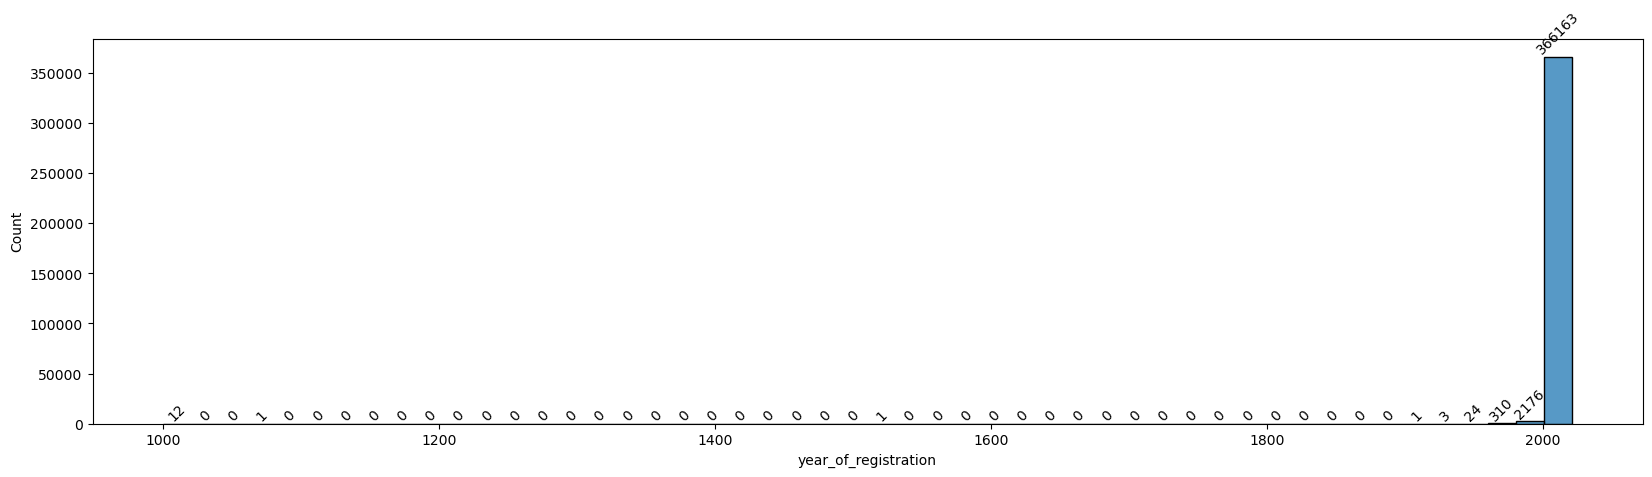

In [27]:
# Detailed Visualization the dispersion measures of year_of_registration column via histogram
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.histplot(df['year_of_registration'], bins=50, binrange=(1000, 2021))

#Labelling bars in the histogram
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

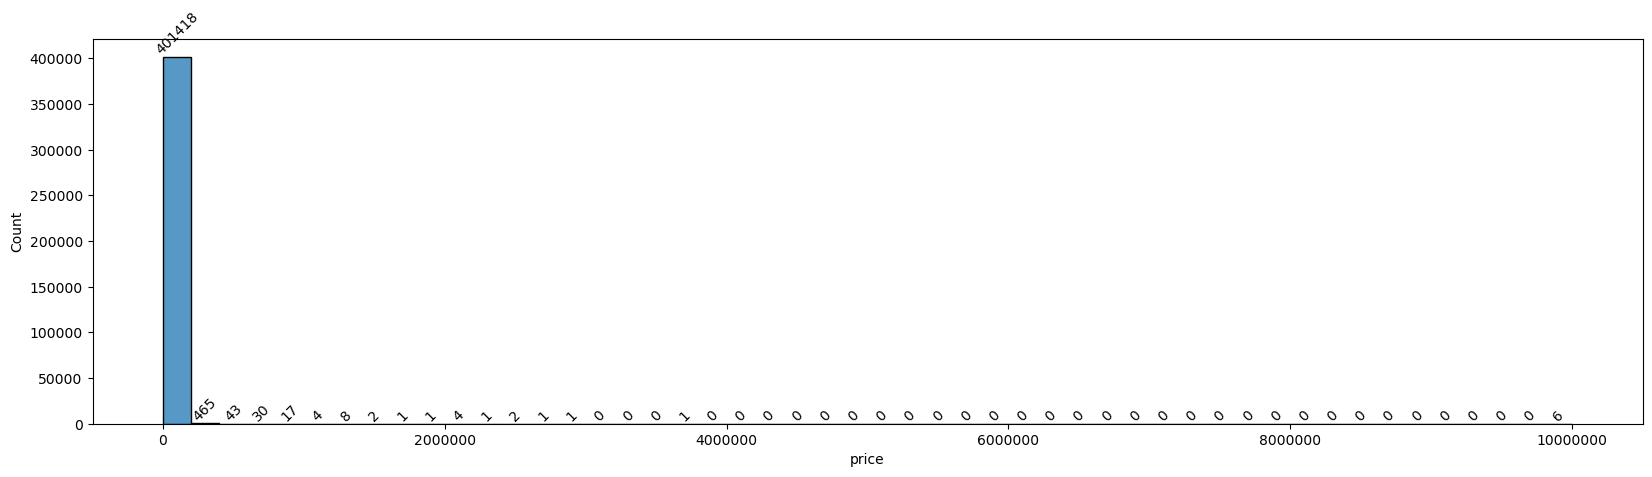

In [29]:
# Detailed Visualization the dispersion measures of price column via histogram
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.histplot(df['price'], bins=50, binrange=(0, 10000000))

# Labelling bars in the histogram
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

<b>Observation(s):</b>
* `mileage` column shows that the milage of most of the vehicles are in between 0 to 20,000. It shows that most of them are either new or a little bit old when it comes to condition.
* `year_of_registration` reveals a very insteresting aspect that most of the cars were registered on the website are fairly new i.e. they have been recently registered during the 2000's era.
* `price` column values dispersion reveals that most of the vehicles on display are within most of the people's budget and there are lesser number of vehicles which are more than £200,000.


### i. Outliers Detection of Quantitative Columns

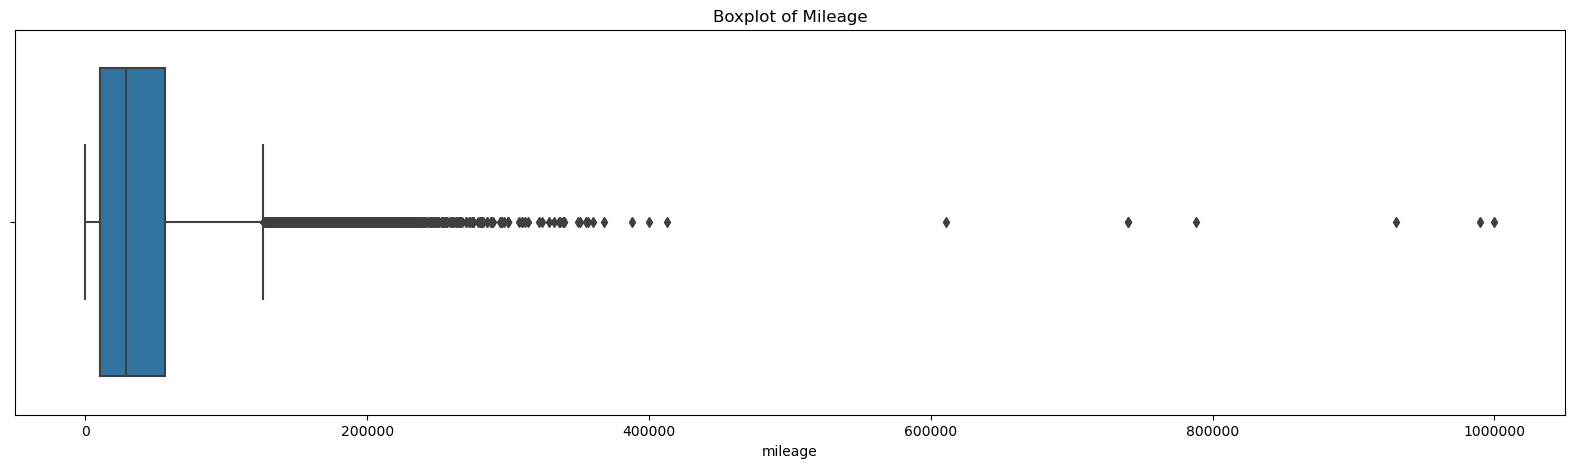

In [30]:
# Outlier detection of the mileage column via a box plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.boxplot(data=df, x='mileage')
plt.title("Boxplot of Mileage")
plt.show()

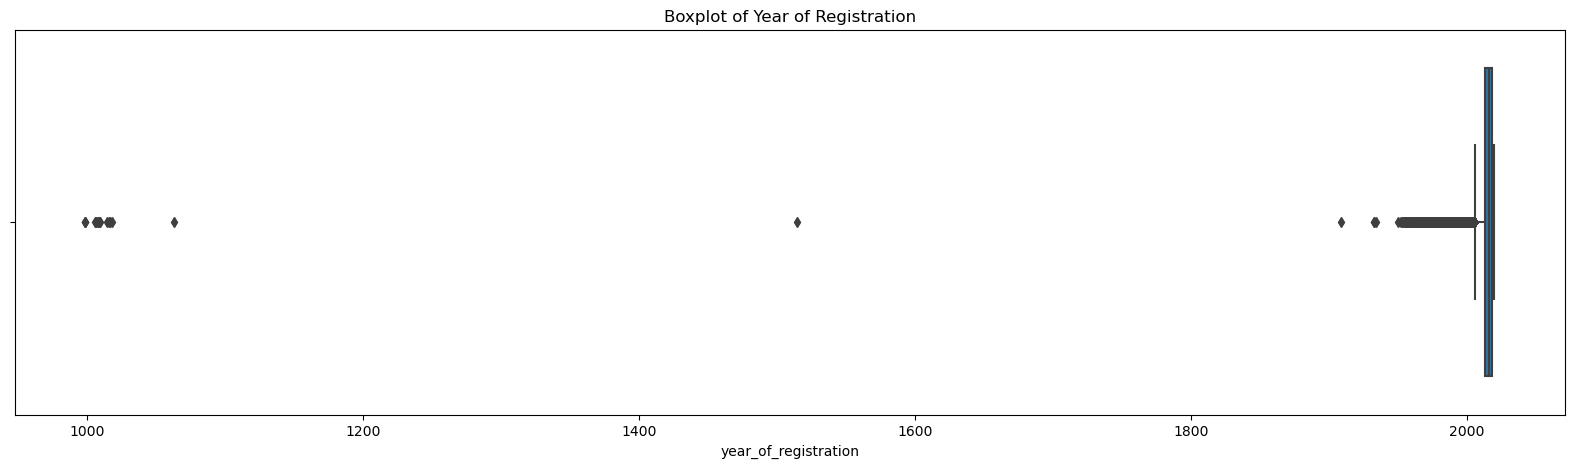

In [33]:
# Outlier detection of the year_of_registration column via a box plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.boxplot(data=df, x='year_of_registration')
plt.title("Boxplot of Year of Registration")
plt.show()

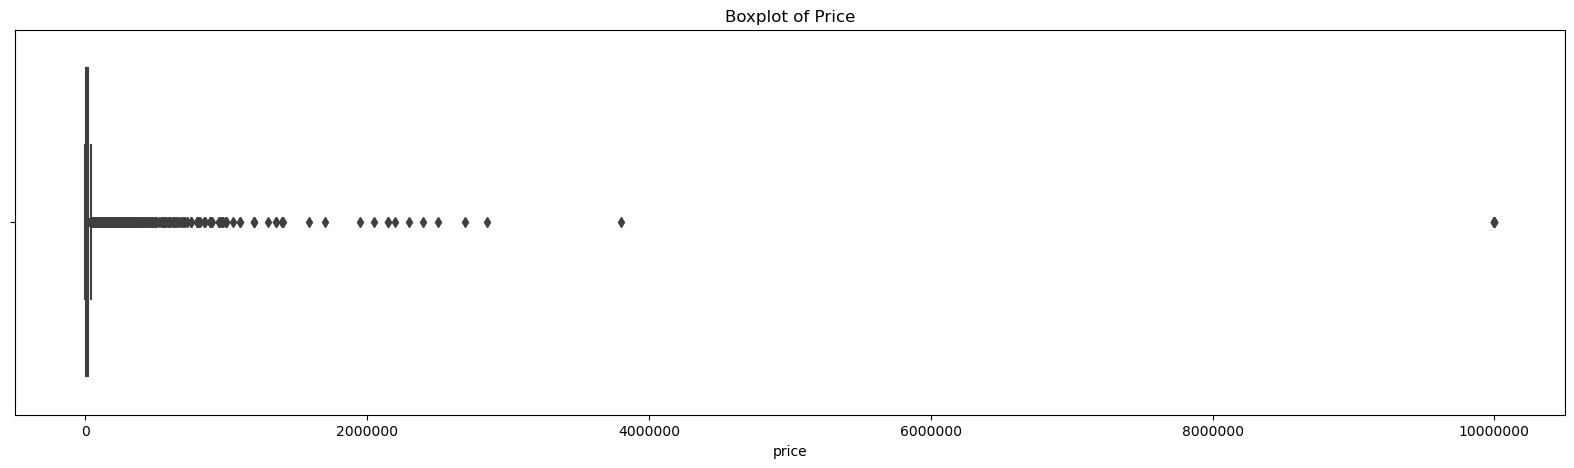

In [34]:
# Outlier detection of the price column via a box plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.boxplot(data=df, x='price')
plt.title("Boxplot of Price")
plt.show()

<b>Observation(s):</b>

* There are a few outliers after `mileage` value of above 150,000 and it should be investigated whether they are genuine values or are values which have error.
* In the `year_of_registration` column, there are a few values which dates even before 1500. So such values needs to be investigated because it's highly unlikely that there are cars for auction, if they have even survived for that long.
* Regarding `price`, a few values are above £380,000 needs to be checked whether they are error values or they are of sports / luxurious cars as they are extremely expensive.

### j. Value Distributions of Qualitative Columns

This section is just about getting detailed information along with values about the related columns for detailed analysis.

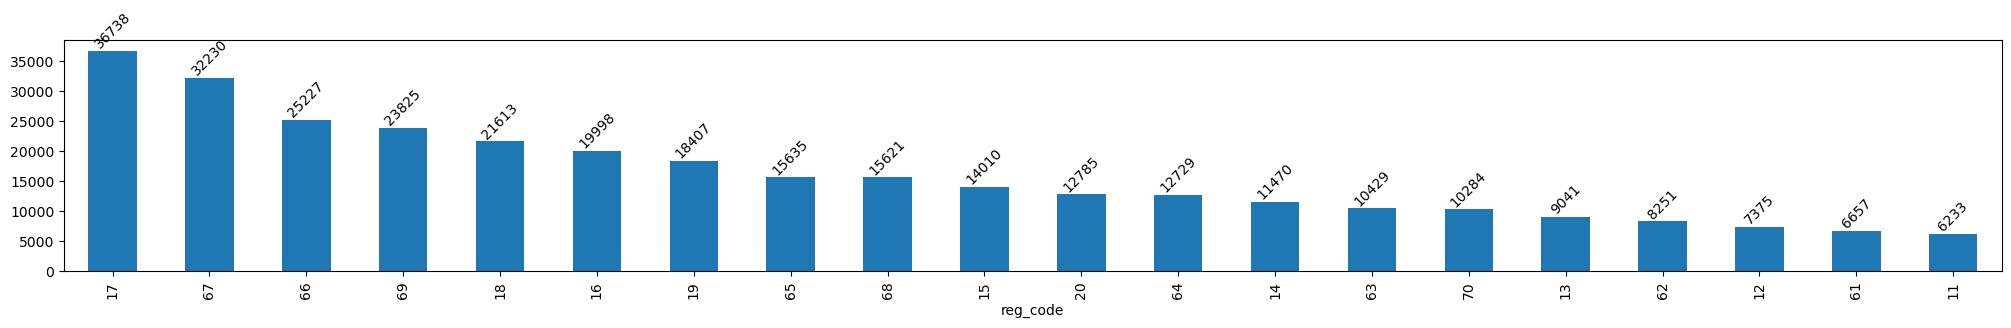

In [36]:
# Detailed Visualization the dispersion measures of reg_code column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['reg_code'].value_counts().nlargest(20).plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

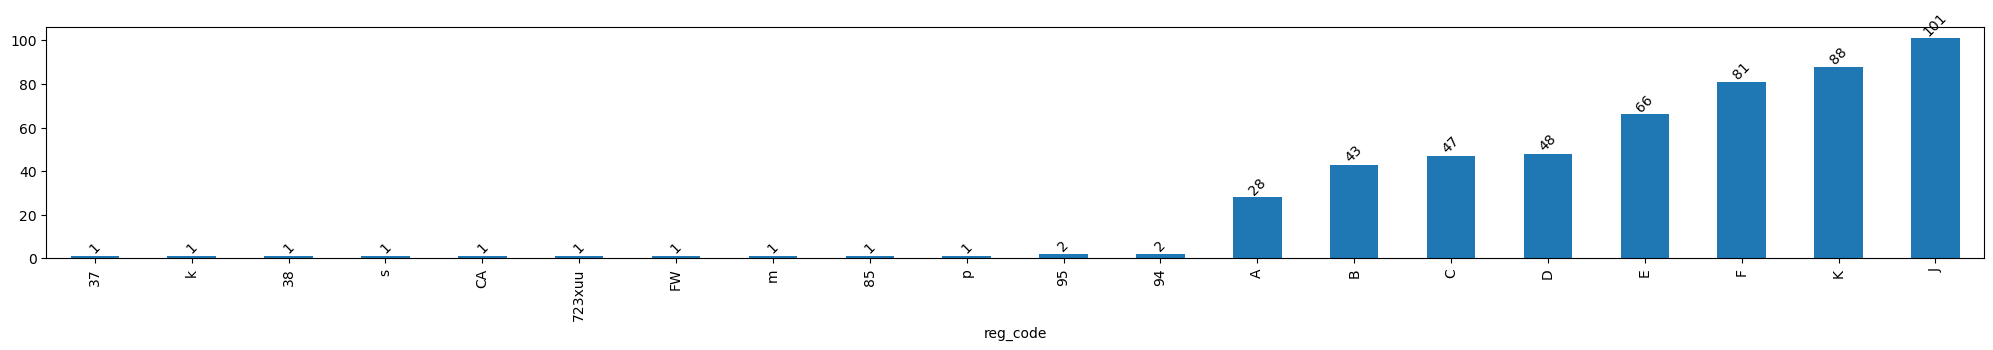

In [37]:
# Detailed Visualization the dispersion measures of reg_code column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['reg_code'].value_counts().nsmallest(20).plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

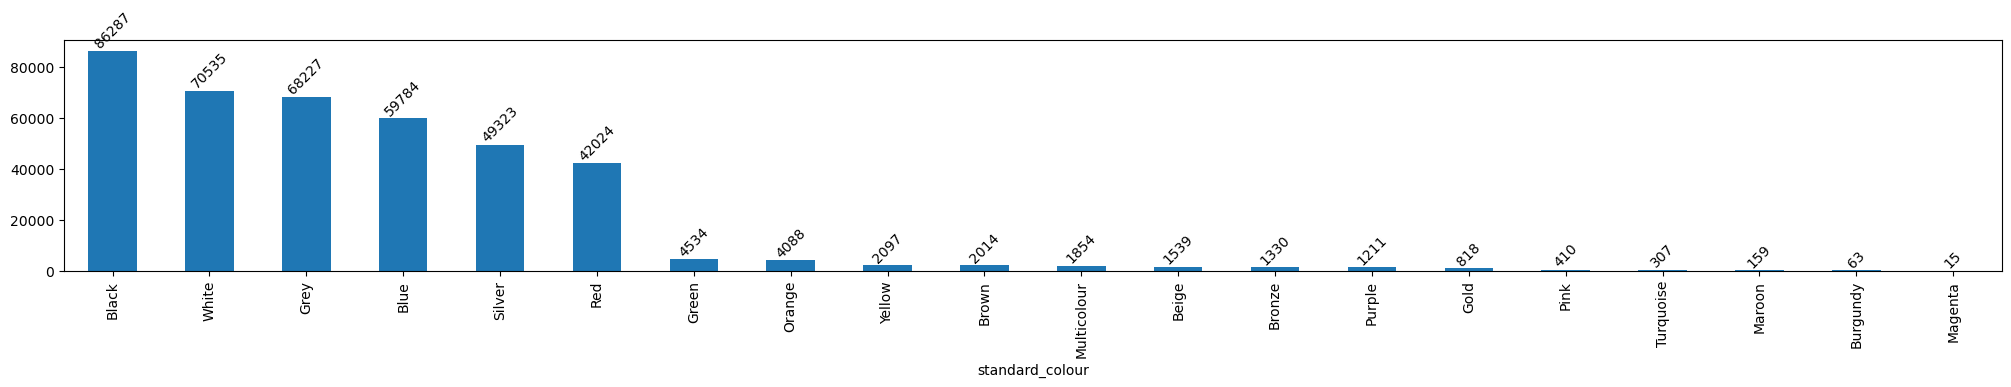

In [30]:
# Detailed Visualization the dispersion measures of standard_colour column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['standard_colour'].value_counts().nlargest(20).plot(kind='bar')

# Labeling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

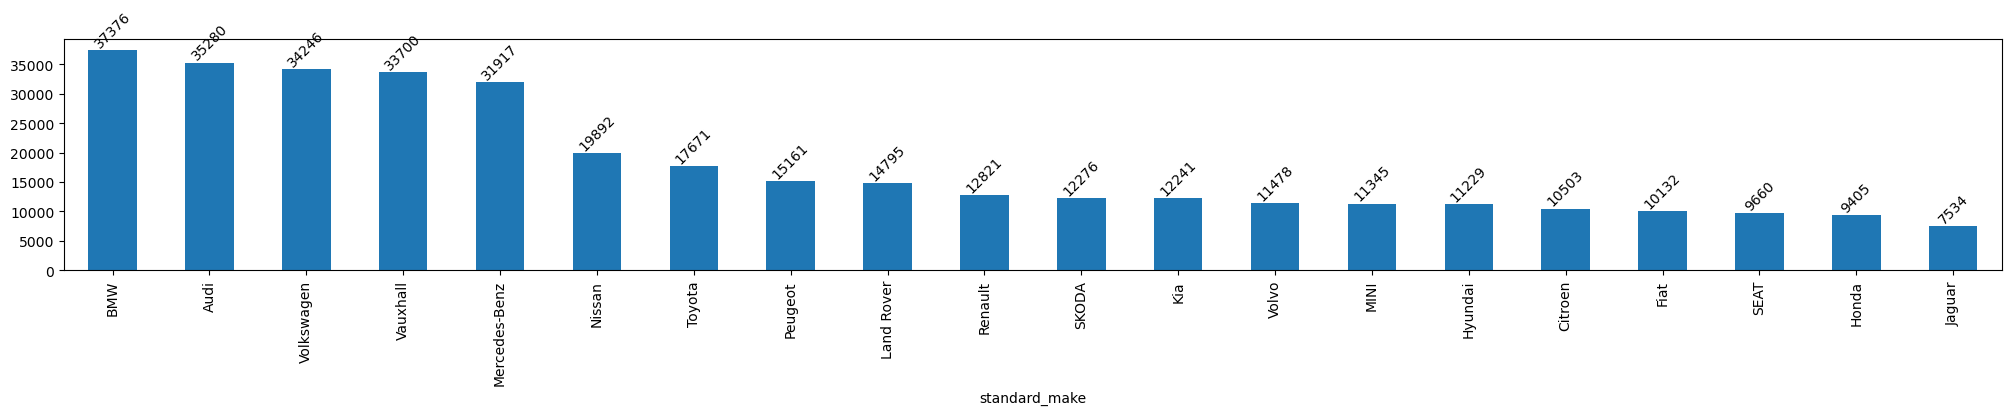

In [38]:
# Detailed Visualization the dispersion measures of standard_make column via bar plot
plt.figure(figsize=(25, 3))
plt.ticklabel_format(style='plain')
ax = df['standard_make'].value_counts().nlargest(20).plot(kind='bar')

# Labeling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

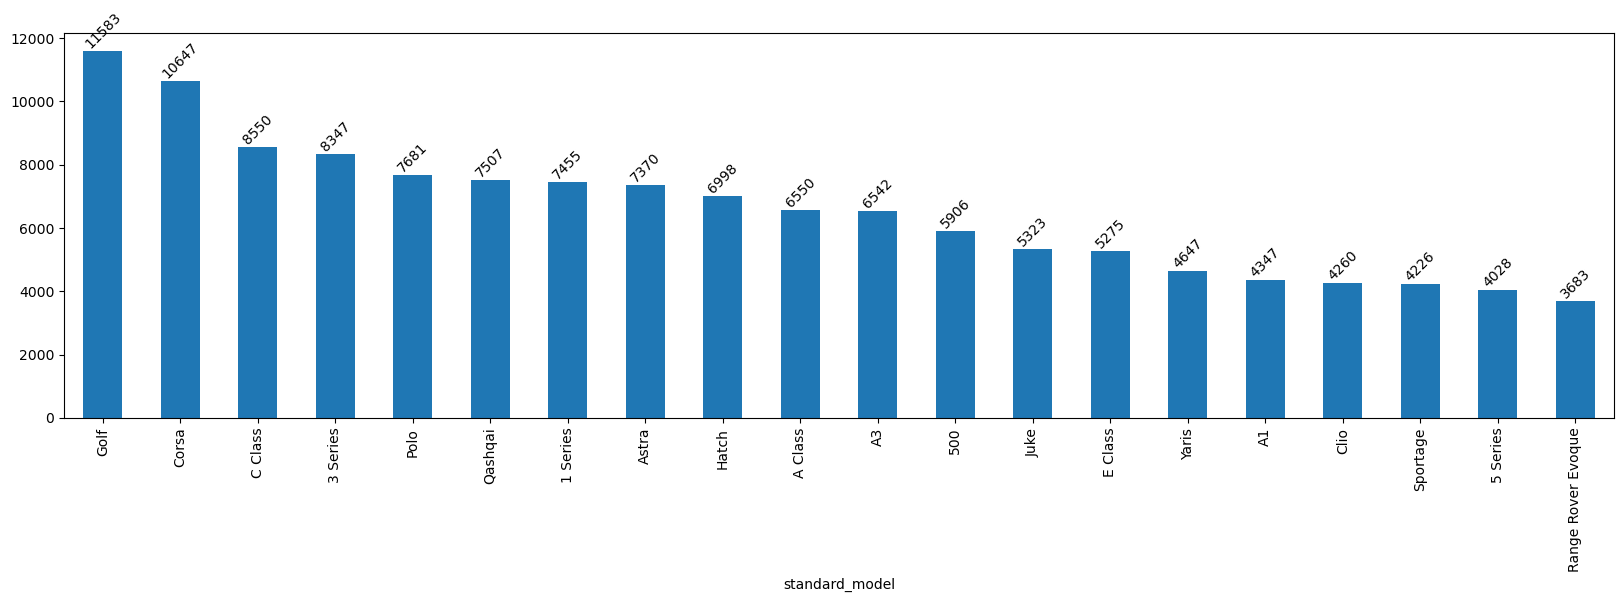

In [39]:
# Detailed Visualization the dispersion measures of standard_model column via bar plot
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = df['standard_model'].value_counts().nlargest(20).plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

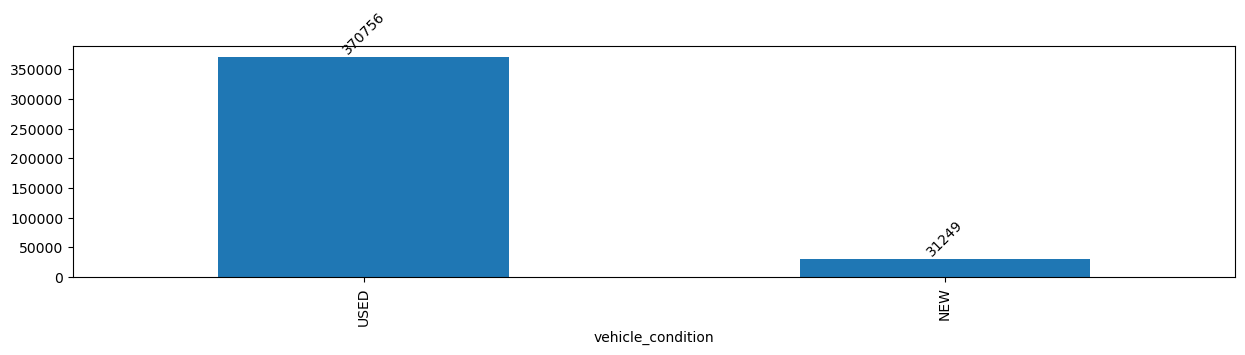

In [40]:
# Detailed Visualization the dispersion measures of vehicle_condition column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['vehicle_condition'].value_counts().plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

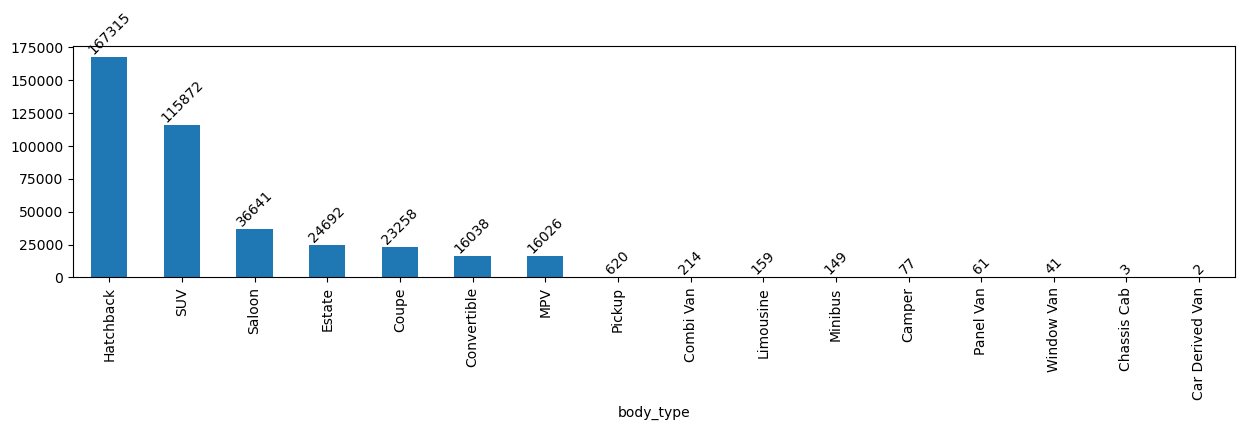

In [41]:
# Detailed Visualization the dispersion measures of body_type column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['body_type'].value_counts().plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

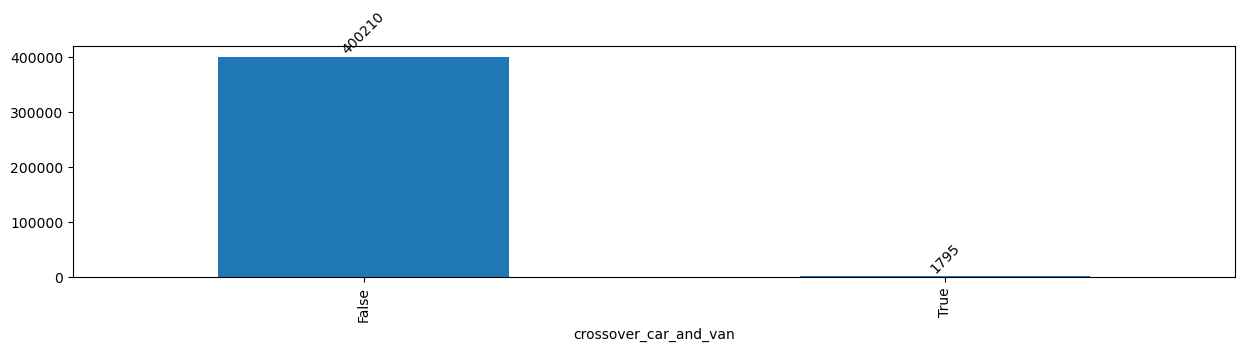

In [42]:
# Detailed Visualization the dispersion measures of crossover_car_and_van column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['crossover_car_and_van'].value_counts().plot(kind='bar')

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

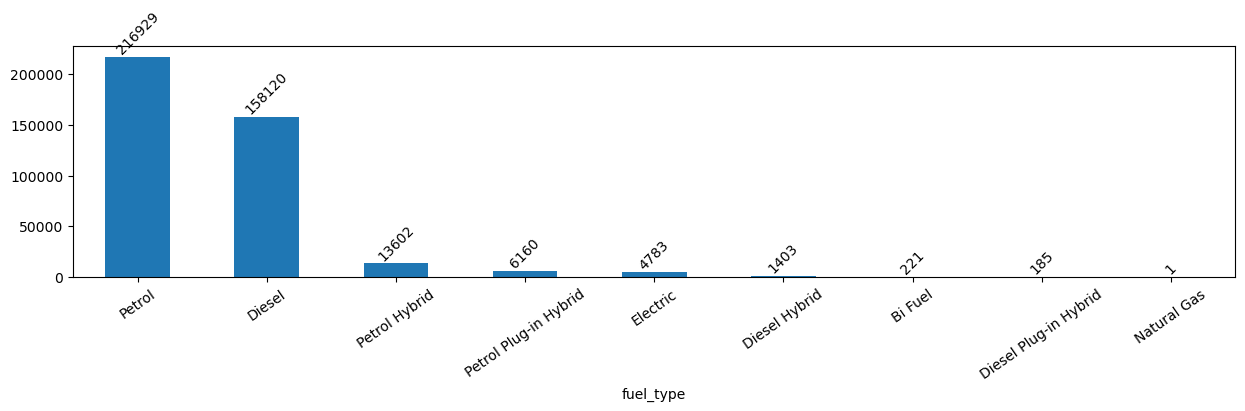

In [43]:
# Detailed Visualization the dispersion measures of fuel_type column via bar plot
plt.figure(figsize=(15, 3))
plt.ticklabel_format(style='plain')
ax = df['fuel_type'].value_counts().plot(kind='bar')
plt.xticks(rotation=35)

# Labelling bars in the barplot
for i in ax.containers:
    ax.bar_label(i, rotation= 45, label_type="edge")
plt.show()

<b> Observation(s): </b>

* `reg_code` seems to have more registeration code which have numbers instead of single letters. This piece of information helps in assuming that most of the cars were registered in the era of 2000's.
* `standard_colour` shows that black, white, and gray are the popular colour choices of people when they buy a car.
* `standard_make` reveals another interesting insight that BMW, Vaukhwagen, Nissan, Toyota, and similar brands are prevalent in numbers which are known to be the ones which people from every class and budget can afford. This information coincides with the `price` column's earlier findings which showed that most of the cars in the inventory are cheaper cars.
* `standard_model` does not reveal any trend because it is simply composed of models which are most assosciated with cheaper and luxuy cars like Volkswagen Golf, Vauxhall Corsa, Mercedes-Benz C-Class, and BMW 3 Series.
* `vehicle_condition` tells that as AutoTrader deals with majorly of used cars, they are higher in number than the newer cars.
* `body_type` reveals that majority of the cars on display are hatchbacks, which are cheaper to buy than SUV because of the smaller size, being lightweight and have one of the best fuel economy. This synchronize with the other earlier analysis that common people are more interested in AutoTrader for buying or selling cars.
* `fuel_type` gives a very common insight that generally in the UK and around the world, cheaper cars' fuel type consist of Petrol & Diesel and these are the cars which are also commonly found on the roads as well. As the other technologies are not an prevailent in the world, the number of users are also lesser than the other fuel types as well.

### k. Outlier Detection of Qualitative Columns

In [44]:
# Saving the list of the categorical columns in a variable
categorical_columns = df.select_dtypes(include='object').columns.tolist()

# Setting the threshold for the least number of values in all the categorical columns which might be outliers
threshold = 5  

# Executing the code for the least number of values in all the categorical columns which might be outliers
for i in categorical_columns:
    print("Column Name:", i)
    less_numbers = df[i].value_counts()[df[i].value_counts() < threshold].index.tolist()
    print("Rare Categories:", less_numbers)

Column Name: reg_code
Rare Categories: ['95', '94', '37', 'k', '38', 's', 'CA', '723xuu', 'FW', 'm', '85', 'p']
Column Name: standard_colour
Rare Categories: ['Indigo']
Column Name: standard_make
Rare Categories: ['Maybach', 'Lancia', 'Holden', 'Opel', 'Jensen', 'Ariel', 'AC', 'Tiger', 'Aixam', 'Beauford', 'Noble', 'Plymouth', 'BAC', 'Pilgrim', 'Dax', 'Zenos', 'Sebring', 'Datsun', 'Gentry', 'Radical', 'Pontiac', 'Buick', 'Mitsuoka', 'AK', 'Carbodies', 'Mev', 'Ultima', 'Panther', 'Leyland', 'Reliant', 'Bristol', 'Wolseley', 'Pagani', 'International', 'Custom Vehicle']
Column Name: standard_model
Rare Categories: ['560', 'Talento', 'Kyron', 'Relay', 'Frontera', 'Alpina B3', 'Tamora', 'Odyssey', 'Charger', 'Boxer', 'P1', '918', 'Tribeca', 'RV8', 'Alpina XD3 Bi-Turbo', 'Commander', 'Seicento', 'T Series', 'Exiga', 'GTO', 'Cygnet', 'Escalade', 'Series I', 'Silver Spur', 'NV250', 'Sienta', 'Stream', 'Epica', 'Lightweight', '4200', '380', '11', 'Z8', 'DB5', 'Pajero', 'Countach', 'CTS', 'Alpin

<b> Observation(s): </b>

As outliers in categorical column cannot be viewed as a boxplot, a different technique <a href="https://www.geeksforgeeks.org/wand-threshold-function-python/" target="_blank">threshold() </a> was used to get some insights on the them.

* `reg_code` reveals that cars having older number plates are lesser in numbers.
* `standard_colour` does not reveal much as they are just colour of cars which are not much in quantity
* `standard_make` & `standard_model` does not reveal much except that it has names of manufacturers like Bugatti which are not that much known to customers.
* `body_type` shows us that commercial automobile like Chassis Cab are lesser in numbers because it is a known website for primarily private customers.
* `fuel_Type` reveals that natural gas is the least fuel type of cars on display

## <b>2. Data Pre-Processing / Cleaning</b>

### a. Detecting & Dealing with Possible Duplicates

In [45]:
# Checking for duplicate rows in the dataset
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape)

Number of duplicate rows:  (0, 12)


Observation:

* No duplicates were found in the dataset

### b. Checking for Possible Outliers and Deleting Them

In [46]:
# Detecting any possible outliers in the mileage in a series and deleting them
mileage_counts = df['mileage'].value_counts().to_frame().reset_index().sort_values(by='mileage', ascending=True)
mileage_counts.columns = ['mileage', 'count']
pd.set_option('display.max_rows', None)

print(mileage_counts)

        mileage  count
0           0.0  16207
87          1.0    724
177         2.0    139
178         3.0    137
165         4.0    164
2           5.0   2434
136         6.0    298
157         7.0    180
122         8.0    397
140         9.0    241
1          10.0  12873
142        11.0    237
144        12.0    224
219        13.0     84
209        14.0     98
72         15.0    795
235        16.0     70
370        17.0     42
321        18.0     47
283        19.0     54
92         20.0    658
352        21.0     43
375        22.0     41
755        23.0     21
724        24.0     22
104        25.0    592
679        26.0     24
855        27.0     18
1286       28.0     12
791        29.0     20
232        30.0     72
1190       31.0     13
928        32.0     17
2657       33.0      9
3968       34.0      8
837        35.0     19
1763       36.0     10
1798       37.0     10
1406       38.0     11
2493       39.0      9
468        40.0     34
7590       41.0      6
441        

In [47]:
df.query('mileage == 999999.0')

public_reference   mileage reg_code standard_colour standard_make  \
43974   202008122406434  999999.0       63           White      Vauxhall   

      standard_model vehicle_condition  year_of_registration  price  \
43974          Astra              USED                2013.0   9999   

       body_type  crossover_car_and_van fuel_type  
43974  Hatchback                  False    Diesel

In [48]:
df.drop(df[df['mileage'] == 999999.0].index, inplace=True)

In [49]:
df.query('mileage == 999999.0')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [50]:
# Detecting any possible outliers in the reg_code column in a series and deleting them
regcode_counts = df['reg_code'].value_counts().to_frame().reset_index().sort_values(by='reg_code', ascending=True)
regcode_counts.columns = ['reg_code', 'count']
pd.set_option('display.max_rows', None)

print(regcode_counts)

   reg_code  count
37       02    559
35       03    880
32       04   1307
31       05   1728
29       06   2373
25       07   3438
24       08   4028
23       09   4076
21       10   5390
19       11   6233
17       12   7375
15       13   9041
12       14  11470
9        15  14010
5        16  19998
0        17  36738
4        18  21613
6        19  18407
10       20  12785
62       37      1
64       38      1
38       51    381
36       52    576
34       53    890
33       54   1279
30       55   1789
28       56   2509
26       57   3415
27       58   3266
22       59   5233
20       60   5551
18       61   6657
16       62   8251
13       63  10428
11       64  12729
7        65  15635
2        66  25227
1        67  32230
8        68  15621
3        69  23825
14       70  10284
67   723xuu      1
70       85      1
61       94      2
60       95      2
59        A     28
58        B     43
57        C     47
66       CA      1
56        D     48
55        E     66
54        F 

In [51]:
# Detecting any possible outliers in the year_of_registration column in a series and deleting them
yreg_counts = df['year_of_registration'].value_counts().to_frame().reset_index().sort_values(by='year_of_registration', ascending=True)
yreg_counts.columns = ['year_of_registration', 'count']
pd.set_option('display.max_rows', None)

print(yreg_counts)

    year_of_registration  count
68                 999.0      3
74                1006.0      1
63                1007.0      3
73                1008.0      1
69                1009.0      2
79                1010.0      1
83                1015.0      1
81                1016.0      1
75                1017.0      1
76                1018.0      1
82                1063.0      1
72                1515.0      1
77                1909.0      1
71                1933.0      2
80                1934.0      1
78                1950.0      1
70                1952.0      2
62                1954.0      4
64                1955.0      3
65                1956.0      3
61                1957.0      5
67                1958.0      3
66                1959.0      3
60                1960.0      5
58                1961.0      7
53                1962.0     10
57                1963.0      7
49                1964.0     14
48                1965.0     14
56                1966.0      8
55      

In [52]:
df.query('year_of_registration <= 1909.0')

public_reference   mileage reg_code standard_colour  standard_make  \
59010    202006270588110   14000.0       07            Blue         Toyota   
69516    202010155035879   96659.0       65           Black           Audi   
84501    202009163810376   37771.0       63           Black          Smart   
114737   202008102305925   30000.0       59             Red         Toyota   
120858   202010064654489   27200.0       66           Black           MINI   
148003   202010104836987   31172.0       09           Black        Hyundai   
190556   202010205206488   58470.0       10           Black           Fiat   
199830   202009013167637   23000.0       59          Silver           MINI   
199987   202010225311657  104000.0       08          Silver            BMW   
201616   202010134937656    8600.0       68          Silver            BMW   
201626   202010155037484   69346.0       64             Red          Mazda   
201773   202008042076716   19000.0       57          Silver  Mercedes-Benz   
213059   202009304380359   54569.0       08          Silver            BMW   
274622   202010024511934    6353.0       17            Blue            BMW   
334679   202010094789497  107934.0       13            Blue           Audi   
339167   202006270588115   38000.0       57           White           MINI   
374798   202008042076722   58000.0       55          Silver         Toyota   
387633   202010195174849   39624.0       65             Red           MINI   

       standard_model vehicle_condition  year_of_registration  price  \
59010           Prius              USED                1007.0   7000   
69516        A4 Avant              USED                1515.0  10385   
84501          fortwo              USED                1063.0   4785   
114737           AYGO              USED                1009.0   4695   
120858        Clubman              USED                1016.0  18990   
148003            i10              USED                1909.0   3950   
190556      Punto Evo              USED                1010.0   3785   
199830          Hatch              USED                1009.0   5995   
199987       1 Series              USED                1008.0   4395   
201616             M2              USED                1018.0  41990   
201626         Mazda3              USED                 999.0   8795   
201773        C Class              USED                1007.0   7295   
213059             Z4              USED                 999.0   7999   
274622       2 Series              USED                1017.0  18990   
334679             A3              USED                 999.0   8895   
339167          Hatch              USED                1007.0   4795   
374798           RAV4              USED                1006.0   5994   
387633        Clubman              USED                1015.0  15290   

          body_type  crossover_car_and_van      fuel_type  
59010     Hatchback                  False  Petrol Hybrid  
69516        Estate                  False         Diesel  
84501         Coupe                  False         Petrol  
114737    Hatchback                  False         Petrol  
120858       Estate                  False         Diesel  
148003    Hatchback                  False         Petrol  
190556    Hatchback                  False         Petrol  
199830    Hatchback                  False         Petrol  
199987  Convertible                  False         Petrol  
201616        Coupe                  False         Petrol  
201626       Saloon                  False         Petrol  
201773       Saloon                  False         Petrol  
213059  Convertible                  False         Petrol  
274622  Convertible                  False         Petrol  
334679    Hatchback                  False         Diesel  
339167    Hatchback                  False         Petrol  
374798          SUV                  False         Petrol  
387633       Estate                  False         Petrol

In [53]:
# Dropping the rows of the column having values less than 1909.0
df.drop(df[df['year_of_registration'] <= 1909.0].index, inplace=True)
df.query('year_of_registration <= 1909.0')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

In [54]:
# Detecting any possible outliers in the price in a series and deleting them
price_counts = df['price'].value_counts().to_frame().reset_index().sort_values(by='price', ascending=True)
price_counts.columns = ['price', 'count']
pd.set_option('display.max_rows', None)

print(price_counts)

         price  count
22050      120      1
21144      122      1
20904      150      1
24059      180      1
8480       200      3
18193      225      1
17251      240      1
3789       250     10
21960      258      1
26698      279      1
11555      290      2
5064       295      7
21008      298      1
25431      299      1
2615       300     15
23952      310      1
11310      325      2
20733      345      1
1968       350     22
24128      354      1
30484      375      1
24425      380      1
23154      389      1
3240       390     12
2442       395     16
13384      399      2
3255       400     11
30478      420      1
6323       425      5
25554      449      1
1772       450     26
18604      460      1
5993       475      5
10432      480      3
6357       489      5
1765       490     26
14225      491      2
1148       495     54
19726      498      1
1415       499     37
766        500     94
16644      501      1
30078      508      1
30337      520      1
7358      

In [55]:
df.query('price == 9999999')

public_reference  mileage reg_code standard_colour standard_make  \
141833   202007050883898  87450.0      NaN             Red       Ferrari   
147188   202009103539048    100.0      NaN            Grey      Maserati   
252505   202008112331147  46300.0      NaN            Blue       Ferrari   
305436   201812223434109   3600.0      NaN            Grey   Lamborghini   
336202   202001226429470    950.0      NaN           Black       Ferrari   
336536   202006180262926   4400.0      NaN           White       Porsche   

       standard_model vehicle_condition  year_of_registration    price  \
141833            250              USED                   NaN  9999999   
147188           3500              USED                   NaN  9999999   
252505            275              USED                   NaN  9999999   
305436          Miura              USED                   NaN  9999999   
336202      LaFerrari              USED                   NaN  9999999   
336536            959              USED                   NaN  9999999   

          body_type  crossover_car_and_van fuel_type  
141833        Coupe                  False    Petrol  
147188  Convertible                  False    Petrol  
252505        Coupe                  False    Petrol  
305436        Coupe                  False    Petrol  
336202        Coupe                  False    Petrol  
336536        Coupe                  False    Petrol

In [56]:
df.drop(df[df['price'] == 9999999].index, inplace=True)
df.query('price == 9999999')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

<b>Observation(s):</b>

* `Mileage` value of 999999.0 was removed because it is assumed that it was for sure a typing error.

* `year_of_registration` values less than and equal to 1909.0 were removed because either the car models I checked were launched after their registration values or automobiles weren't invented by then. So, obviously the values were forged / erroranous and since the values are lesser in numbers, they are dropped.

* `price` value of 9999999 was dropped because of it being entered as either by mistake or deliberately by the seller.

### c. Handling Missing Values & Dealing with Them

In [57]:
# Checking for missing values in the dataset
df.isnull().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour           5378
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [58]:
# Taking a mode of standard_colour for each standard_make and standard_model combination
standard_model_mode_series = df.groupby(['standard_make', 'standard_model'])['standard_colour'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['standard_colour'] = df['standard_colour'].fillna(standard_model_mode_series)

In [59]:
# 24 missing values in standard_colour remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                  837
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [60]:
# Taking a mode of body_type for each standard_make and standard_model combination
body_type_mode_series = df.groupby(['standard_make', 'standard_model'])['body_type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['body_type'] = df['body_type'].fillna(body_type_mode_series)

In [61]:
# 35 missing values in body_type remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                  601
dtype: int64

In [62]:
# Taking a mode of fuel_type for each standard_make and standard_model combination
fuel_type_mode_series = df.groupby(['standard_make', 'standard_model'])['fuel_type'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['fuel_type'] = df['fuel_type'].fillna(fuel_type_mode_series)

In [63]:
# 16 missing values in body_type remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference             0
mileage                    127
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                   16
dtype: int64

In [64]:
# Taking a mean of mileage for each standard_make and standard_model combination
mileage_mean_series = df.groupby(['standard_make', 'standard_model'])['mileage'].transform('mean')
df['mileage'] = df['mileage'].fillna(mileage_mean_series)

In [65]:
df.isna().sum()

public_reference             0
mileage                      0
reg_code                 31851
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                   16
dtype: int64

In [66]:
# Although Registraton Codes are unique for every vehicle registered, however we will assume that specific cars have specific registration codes and will take a mode of registration code for each standard_make and standard_model combination
df.groupby(['standard_make','standard_model','reg_code']).size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count', ascending=False).nlargest(3, 'Count')

standard_make standard_model reg_code  Count
8249         Nissan        Qashqai       17   1005
12219    Volkswagen           Golf       17    945
8264         Nissan        Qashqai       67    930

In [67]:
# Taking a mode of reg_code for each standard_make and standard_model combination
reg_code_mode_series = df.groupby(['standard_make', 'standard_model'])['reg_code'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['reg_code'] = df['reg_code'].fillna(reg_code_mode_series)

In [68]:
# 52 missing values in reg_code remains which does not have any standard_make and standard_model combination
df.isnull().sum()

public_reference             0
mileage                      0
reg_code                    52
standard_colour             24
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     33305
price                        0
body_type                   35
crossover_car_and_van        0
fuel_type                   16
dtype: int64

In [69]:
# Although the values in year_of_registration should b unique irrespective of the release, but for the sake of filling the missing data, we assume that cars were registered
# in the same year of the release of a vehicle.
df.groupby(['standard_make','standard_model','year_of_registration']).size().reset_index().rename(columns={0:'Count'}).sort_values(by='Count', ascending=False).nlargest(5, 'Count')

standard_make standard_model  year_of_registration  Count
5087         Nissan        Qashqai                2017.0   1915
7534     Volkswagen           Golf                2017.0   1802
4329  Mercedes-Benz        C Class                2019.0   1620
7636     Volkswagen           Polo                2017.0   1583
4949         Nissan           Juke                2017.0   1582

In [70]:
# Taking a mode of year_of_registration for each standard_make and standard_model combination
year_of_registration_mode_series = df.groupby(['standard_make', 'standard_model'])['year_of_registration'].transform(lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA)
df['year_of_registration'] = df['year_of_registration'].fillna(year_of_registration_mode_series)

In [71]:
# 28 missing values in year_of_registration remains which does not have any standard_make and standard_model combination
df.isna().sum()

public_reference          0
mileage                   0
reg_code                 52
standard_colour          24
standard_make             0
standard_model            0
vehicle_condition         0
year_of_registration     28
price                     0
body_type                35
crossover_car_and_van     0
fuel_type                16
dtype: int64

In [72]:
# Deleting all the remaining missing values in the dataset 
df.dropna(inplace=True)

In [73]:
#Rechecking whether all the missing values have been handled
df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64

In [74]:
# Checking out the shape of the dataset after handling missing values
df.shape

(401872, 12)

Observations:

* For `standard_colour`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `body_type`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `fuel_type`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `mileage`, `standard_make` & `standard_model` were grouped by and value of it's relevant mean was taken & updated in the relevant observations with NaN values.
* For `reg_code`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* For `year_of_registration`, `standard_make` & `standard_model` were grouped by and value of it's relevant mode was taken & updated in the relevant observations with NaN values.
* The rest of the 155 NaN values were dropped as it did not have any way to be resolved.
</n>

* Out of the `402,005` observations in the original dataset with erroneous / missing values, `99.97` percent of the values were wrangled based on the patterns / extractions for the existing related values, and because of that `401,872` observations are ready to for the next phase of modelling / reshaping in the EDA.

### d. Engineering Features for Improved Analysis

In [75]:
# Changing year_of_registration data type in columns from float64 to int64
df['year_of_registration'] = df['year_of_registration'].astype('int64')

In [76]:
# Checking whether the data types of year_of_registration has been changed
df.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration       int64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [77]:
# According to assumptional research, mileage up to 100 miles is considered as new car, so we will replace status with `NEW` for mileage less than or equals to 100 miles
mask = (df['vehicle_condition'] == 'USED') & (df['mileage'] <= 100)
x = df[mask].sort_values(by='mileage', ascending=False)['vehicle_condition'].replace('USED', 'NEW')
df.update(x)

In [78]:
# Checking whether the vehicle_condition has been updated
df.query('vehicle_condition == "USED" and mileage <= 100')

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type]
Index: []

<b>Observation(s):</b>
* The datatype of `year_of_registration` was changed from `float64` to `int64` because it will be easier to visualize in the next step.
* Some of the research was done regarding the status of vehicle and in relation to that it is assumed that cars having `mileage` value till 100 miles is considered as 'NEW' in the `vehicle_condition` column and the rest will be considered as 'OLD' cars.

### e. Modeling the Dataset

In [79]:
# Creating a new column for age of the vehicle with the assumption that the values wiill be subtracted from 2021.
df['age_of_vehicle'] = 2021 - df['year_of_registration']

In [80]:
df[['year_of_registration', 'age_of_vehicle']].head(3)

year_of_registration  age_of_vehicle
0                  2019               2
1                  2011              10
2                  2017               4

In [81]:
# Declaring price bins and it's related labels for the used cars
price_bins = [0, 13999, 17999, 21999, 25999, 29999, 33999, 37999, float('inf')]
price_labels = ['Very Low', 'Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High', 'Luxury']

# Executing the query to select used car condition & inseting the price category in the dataset
df['price_category'] = pd.cut(df.query('vehicle_condition == "USED"')['price'], bins=price_bins, labels=price_labels, right=True)

In [82]:
# Extracting sample of the dataset
df.query('vehicle_condition == "USED"').head(5)

public_reference   mileage reg_code standard_colour standard_make  \
1   202007020778260  108230.0       61            Blue        Jaguar   
2   202007020778474    7800.0       17            Grey         SKODA   
3   202007080986776   45000.0       16           Brown      Vauxhall   
4   202007161321269   64000.0       64            Grey    Land Rover   
5   202009304412074   16000.0       17            Blue          Audi   

      standard_model vehicle_condition  year_of_registration  price  \
1                 XF              USED                  2011   7000   
2               Yeti              USED                  2017  14000   
3              Mokka              USED                  2016   7995   
4  Range Rover Sport              USED                  2015  26995   
5                 S5              USED                  2017  29000   

     body_type  crossover_car_and_van fuel_type  age_of_vehicle price_category  
1       Saloon                  False    Diesel              10       Very Low  
2          SUV                  False    Petrol               4            Low  
3    Hatchback                  False    Diesel               5       Very Low  
4          SUV                  False    Diesel               6    Medium-High  
5  Convertible                  False    Petrol               4    Medium-High

In [83]:
# Declaring price bins and it's related labels for new cars
price_bins = [0, 11999, 16999, 21999, 35999, 49999, 69999, 99999, float('inf')]
price_labels = ['Very Low', 'Low', 'Medium-Low', 'Medium', 'Medium-High', 'High', 'Very High', 'Luxury']

df.loc[df['vehicle_condition'] == 'NEW', 'price_category'] = pd.cut(df.loc[df['vehicle_condition'] == "NEW", 'price'], bins=price_bins, labels=price_labels, right=True)

In [84]:
df.query('vehicle_condition == "NEW"').head(5)

public_reference  mileage reg_code standard_colour standard_make  \
0    202006039777689      0.0       69            Grey         Volvo   
17   201911043995897      5.0       17           Black        Nissan   
19   202008272998331      0.0       20           White    Volkswagen   
37   202001306737473      0.0       70           White          Fiat   
44   202003178531910      0.0       67          Silver         Honda   

   standard_model vehicle_condition  year_of_registration  price  body_type  \
0            XC90               NEW                  2019  73970        SUV   
17        X-Trail               NEW                  2017  27595        SUV   
19        T-Cross               NEW                  2020  25000        SUV   
37          Panda               NEW                  2014  13999  Hatchback   
44          Civic               NEW                  2017  19495  Hatchback   

    crossover_car_and_van              fuel_type  age_of_vehicle  \
0                   False  Petrol Plug-in Hybrid               2   
17                  False                 Diesel               4   
19                  False                 Petrol               1   
37                  False                 Petrol               7   
44                  False                 Petrol               4   

   price_category  
0       Very High  
17         Medium  
19         Medium  
37            Low  
44     Medium-Low

In [85]:
# Checking if there are NaN values in the dataset
df.isna().sum()

public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
age_of_vehicle           0
price_category           0
dtype: int64

<b>Observation(s):</b>

* As the dataset is four years old and data regarding to inflation rate, depreciation rate, market demand & trends, regional price differences, and model-specific factors was not available so it is assumed that the age of the vehicle is being calculated & assumed by subtracting 2021 from `year_of_registration` to help with association.
* A new `price_category` column was created using a new function <a href="https://pandas.pydata.org/docs/reference/api/pandas.cut.html" target="blank">pd.cut</a> after distributing and labelling the `price` values into almost equal-sized quantiles / bins. All those categories are assumed after getting the price ranges from <a href="https://www.honestjohn.co.uk/used-prices/2020/" target="blank">Honest John</a> for meaningful categories for analysis or visualization for old car price ranges. Furthermore, similar code was executed for cars where `vehicle_condition` is NEW and data was researched and assumed from different websites like <a href="https://www.motors.co.uk/car-price-guide/" target="blank">Motors CO UK</a>.

## <b>3. Analysis of Associations and Group Differences</b>

Although whole of the dataset was used in the earlier processes, a small sample or subset will be utilized for the last section of visualization:

* To reduce computational time and cognitive load
* To view and interpret the trends more clearly and precisely
* To remove bias and generating a representative sample, a random fraction of the dataset for `every year` will be extracted so that both old and new cars, irrespective of when they were registered and how many data points they have, will be included so it will have equal representation without elimination of specific years or model of a car.

In [87]:
# Taking a sample from the dataset for this visualization and name it as df1
df1 = df.groupby('year_of_registration').sample(frac=0.01, random_state=1)

# Extracting the number of values as per the year of registration
df1['year_of_registration'].value_counts()

year_of_registration
2017    850
2016    480
2019    433
2018    397
2020    349
2015    291
2014    242
2013    191
2012    153
2011    127
2010    108
2009     90
2008     73
2007     67
2006     47
2005     34
2004     25
2003     17
2002     11
2001      7
2000      4
1999      3
1998      2
1997      2
1989      1
1996      1
1995      1
1994      1
1993      1
1992      1
1991      1
1990      1
1988      1
Name: count, dtype: int64

In [88]:
df1.sample(5)

public_reference  mileage reg_code standard_colour  standard_make  \
23184    202010195179396  94907.0       63           Black     Land Rover   
147215   202009173860688  30115.0       17           Black     Mitsubishi   
222020   202009244135326  32111.0       18             Red          Volvo   
202083   202007311920561  13121.0       66            Grey        Citroen   
399618   202010295576498   8360.0       69           Black  Mercedes-Benz   

            standard_model vehicle_condition  year_of_registration  price  \
23184   Range Rover Evoque              USED                  2013  13500   
147215           Outlander              USED                  2017  14950   
222020                XC40              USED                  2018  30500   
202083    Grand C4 Picasso              USED                  2016  11400   
399618             C Class              USED                  2019  19991   

       body_type  crossover_car_and_van fuel_type  age_of_vehicle  \
23184        SUV                  False    Diesel               8   
147215       SUV                  False    Diesel               4   
222020       SUV                  False    Diesel               3   
202083       MPV                  False    Diesel               5   
399618    Saloon                  False    Petrol               2   

       price_category  
23184        Very Low  
147215            Low  
222020           High  
202083       Very Low  
399618     Medium-Low

### a. Analysis of Associations & Group Differences with Price

#### i) Quantitative-Quantitative

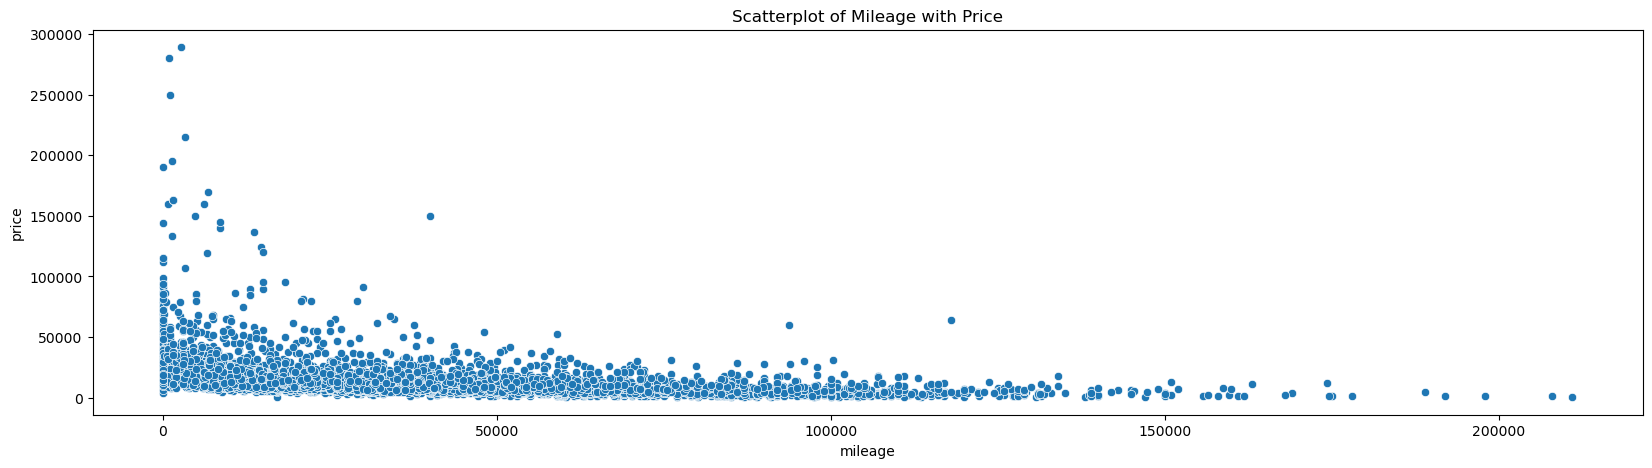

In [94]:
# Scatterplot of mileage with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
sns.scatterplot(data=df1, x='mileage', y='price')
plt.title("Scatterplot of Mileage with Price")
plt.show()

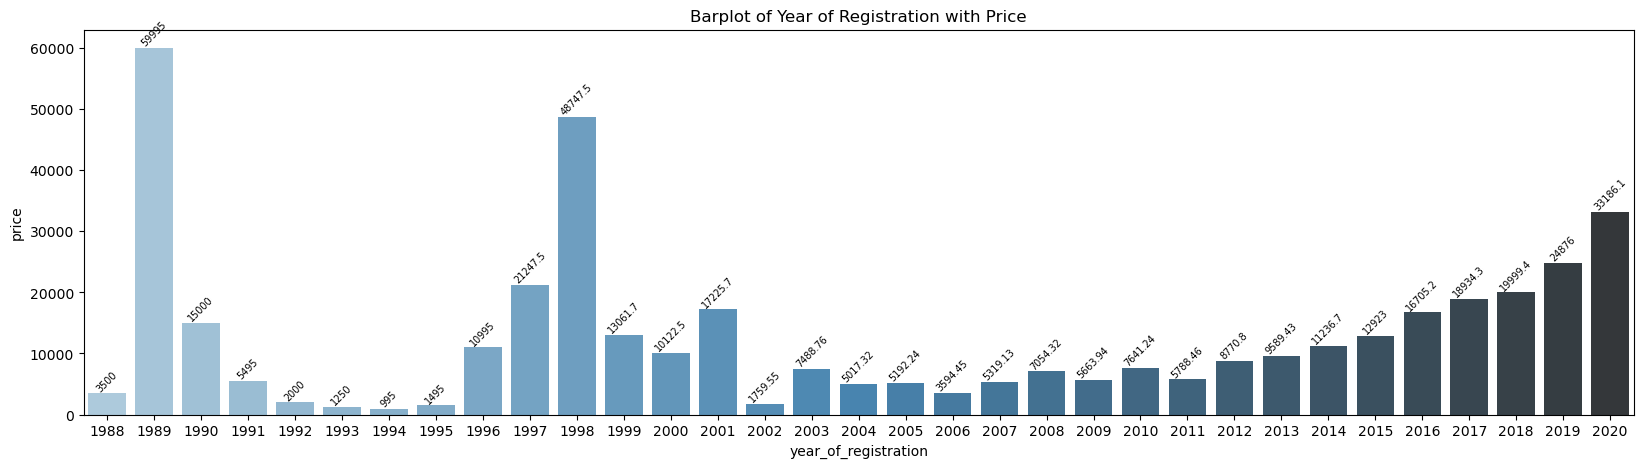

In [95]:
# Barplot of year of registration with price 
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df1, x='year_of_registration', y='price', errorbar=None, palette='Blues_d')
for i in ax.containers:
    ax.bar_label(i,label_type="edge", size=7, rotation= 45)
plt.title("Barplot of Year of Registration with Price")
plt.show()

In [96]:
df1.query('year_of_registration == 1989 | year_of_registration == 1998 ')

public_reference  mileage reg_code standard_colour standard_make  \
7122     202007241649745  93770.0        F           Black       Porsche   
121352   201909041846301  15000.0        S             Red       Ferrari   
386199   202009274276547  54500.0        S     Multicolour         Rover   

       standard_model vehicle_condition  year_of_registration  price  \
7122              911              USED                  1989  59995   
121352           F355              USED                  1998  89995   
386199           Mini              USED                  1998   7500   

          body_type  crossover_car_and_van fuel_type  age_of_vehicle  \
7122          Coupe                  False    Petrol              32   
121352  Convertible                  False    Petrol              23   
386199       Saloon                  False    Petrol              23   

       price_category  
7122           Luxury  
121352         Luxury  
386199       Very Low

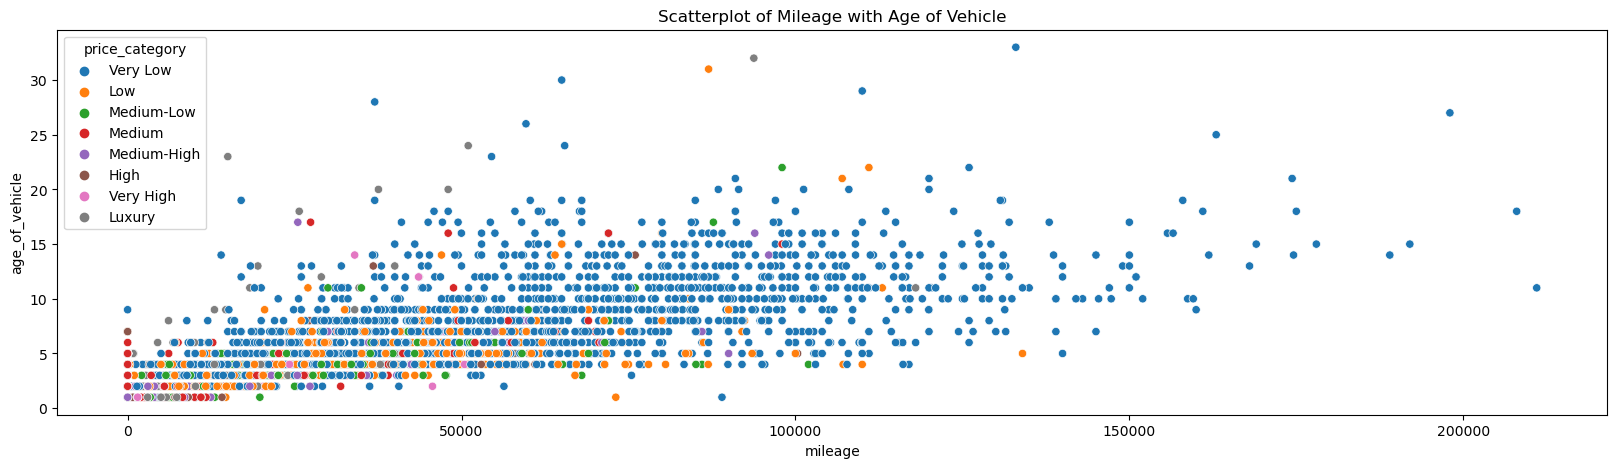

In [97]:
# Scatterplot of mileage with age of vehicle and classification of data points with price category
plt.figure(figsize=(20, 5))
sns.scatterplot(x=df1['mileage'], y=df1['age_of_vehicle'], hue=df1['price_category']).ticklabel_format(style='plain')
plt.title("Scatterplot of Mileage with Age of Vehicle")
plt.show()

<b>Observation(s):</b>
* According to the first scatterplot, whenever `mileage` increase, then `price` of the car decreases. So, there is a negative but strong association in between both of them.
* Overall there is a positive and strong association in between `year_of_registration` and `price` in the second bar plot. However, it can be observed that there is a couple irregular tall bar for the year of 1998 and 1989 and it is because of two luxury cars which are up for sale & it will be analysed later in this section. Overall, it is a clear trend that recently registered cars have higher prices if you compare them with those which were registered further in the past.
* In the third scatterplot which is in between `mileage` and `age_of_vehicle`, it can be easily observed that price decrease with the increase in `mileage` and `age_of_vehicle` for all the cars. This is mainly due to the detoriating condition and value of the vehicle in due time and usage. Moreover, colour coding the data points based on the `price_category` establishes this hypothesis that it decreases with the combination of those two features.

<b> Recommendation(s):</b>
* After analysis of the patterns, it is analysed that customers with newer & cheaper vehicles with lower mileage are in large numbers. So, it is suggested that AutoTrader can introduce some incentives, like free registration for such customers to further increase the number of car sales and can ultimately earn higher profit for them.

#### ii) Quantitative-Categorical

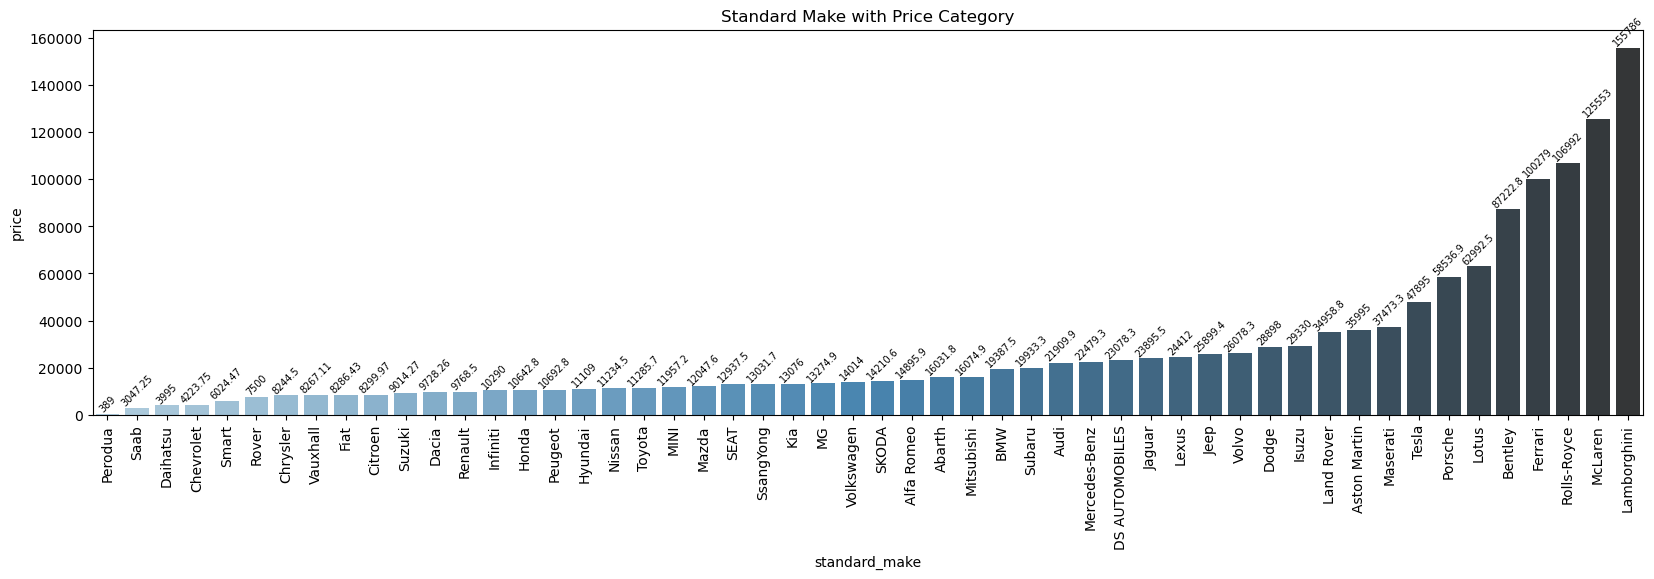

In [98]:
# Bar plot of standard_make with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df1.groupby('standard_make')['price'].mean().reset_index().sort_values(by='price', ascending=True), x='standard_make', y='price', errorbar=None, palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7)
plt.title("Standard Make with Price Category")
plt.show()

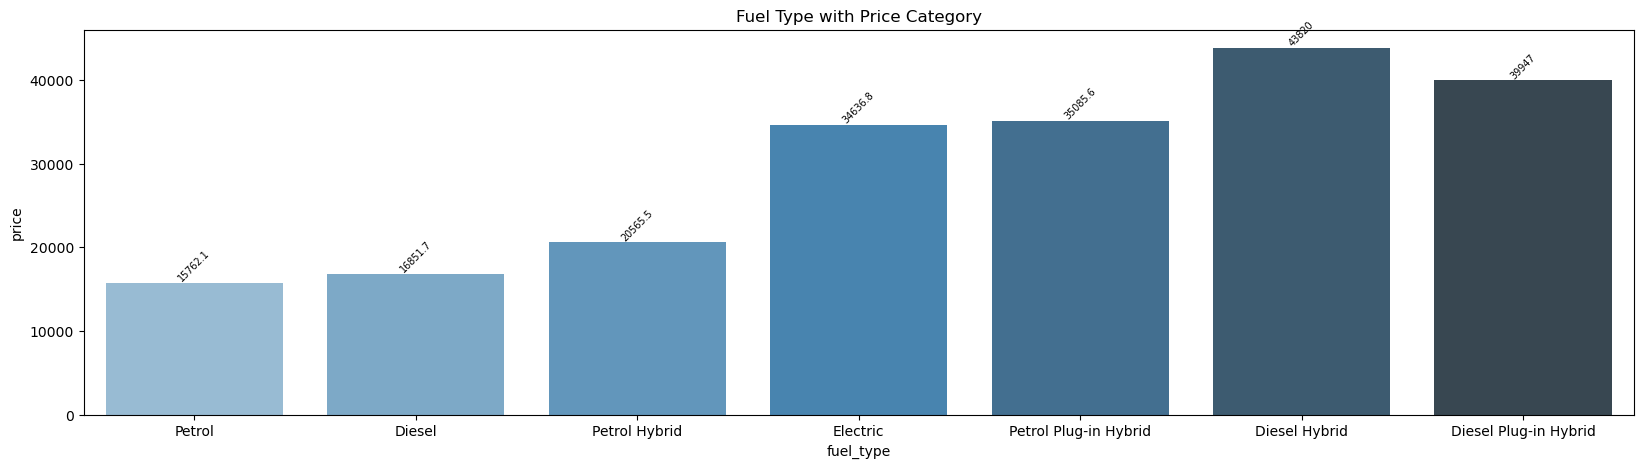

In [99]:
# Bar plot of fuel_type with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=df1.sort_values('price', ascending=True), x='fuel_type', y='price', errorbar=None, palette='Blues_d')
for i in ax.containers:
    ax.bar_label(i, rotation=45 ,label_type="edge", size=7) 
plt.title("Fuel Type with Price Category")
plt.show()

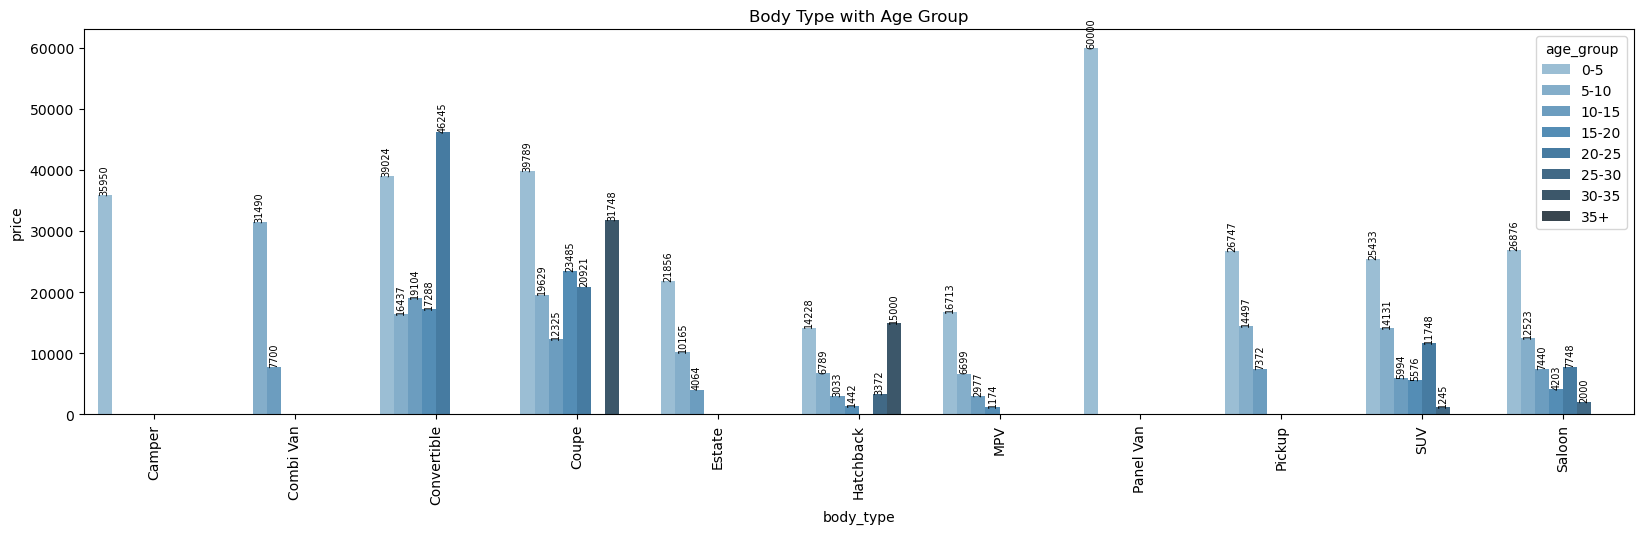

In [101]:
# Declaring the bins and it's related labels
v_age_bins = [0, 5, 10, 15, 20, 25, 30, 35, float('inf')]
v_age_labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35+']

# Copying the dataset to a new dataframe
df_group = df1.copy()
df_group['age_group'] = pd.cut(df_group['age_of_vehicle'], bins=v_age_bins, labels=v_age_labels, right=True)

grouped_dataset = df_group.groupby(['body_type', 'age_group'])['price'].mean().round().reset_index()

# visualizing the grouped dataset of body_type with price
plt.figure(figsize=(20, 5))
plt.ticklabel_format(style='plain')
ax = sns.barplot(data=grouped_dataset, x='body_type', y='price', hue='age_group', palette='Blues_d')
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i, rotation=90 ,label_type="edge", size=7)
plt.title("Body Type with Age Group")
plt.show()

<b>Observation(s):</b>
* When comparing `standard_make` with `price` in the first plot, it is quite evident that the some specific manufacturers like Lamorgini, McLargen, Rolls-Royce are associated with higher prices of cars than other manufacturers like Toyota, Nissan, etc.That is why they are priced higher & it reflects that manufacturer's image / repututation plays a key role in price.
* In the `fuel_type` second categorical column, type of fuel of a car have significant impact on the price. For instance, petrol and diesel cars are more widely acceptable, cheaper, and have access to a wider number of populations. On the contrary, even though newer technologies of hybrid electric cars are efficient, but cost of manufacturing, buying, and refuelling options for the customers are expensive. That is why cars having conventional fuel systems like petrol & diesel are priced lower.
* Grouped bar chart gives an estimate as to how much `body_type` effects `price` of all the vehicles available in the sample, irrespective of the brand. Hatchback is the worst when it comes to retaining it's value & effects greatly as far as `age_of_vehicle` is concerned. On the contrary, Convertible and then Coupe are the types which retains it's price much better than others.

<b>Recommendation(s):</b>
* Most of the existing cars have conventional petrol and diesel fuel systems fitted in them. So, relevant stakeholders at the company can further emphasize and target the customers with similar needs to boost sales and profits.
* As convertible and coupe body types retains it's values much longer than other ones, marketing team can increase the number of new or old vehicles with same body type to convince the prospective customers that the purchase of such vehicles can help you retain the value of the cars to a much longer period.

#### iii) Qualitative-Qualitative

<Figure size 2000x500 with 0 Axes>

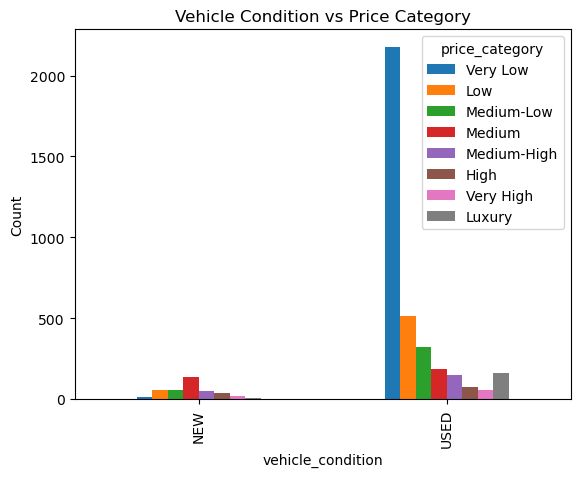

In [102]:
# stacked bar chart of vehicle_condition with price category
plt.figure(figsize=(20, 5))
pd.crosstab(df1['vehicle_condition'], df1['price_category']).plot(kind='bar', stacked=False)
plt.ylabel('Count')
plt.title('Vehicle Condition vs Price Category')
plt.show()

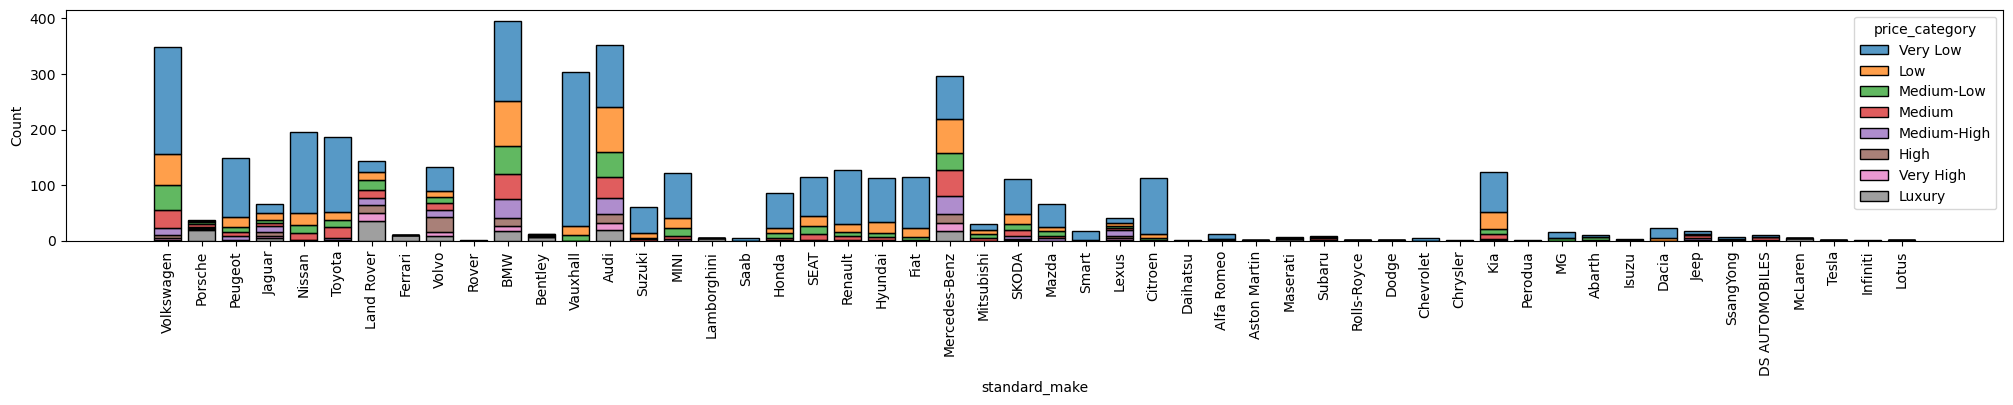

In [103]:
# stacked bar chart of standard_make with price category
plt.figure(figsize=(25, 3))
sns.histplot(data=df1, x='standard_make', hue='price_category', multiple='stack', shrink=0.8)
plt.xticks(rotation=90)
plt.show()

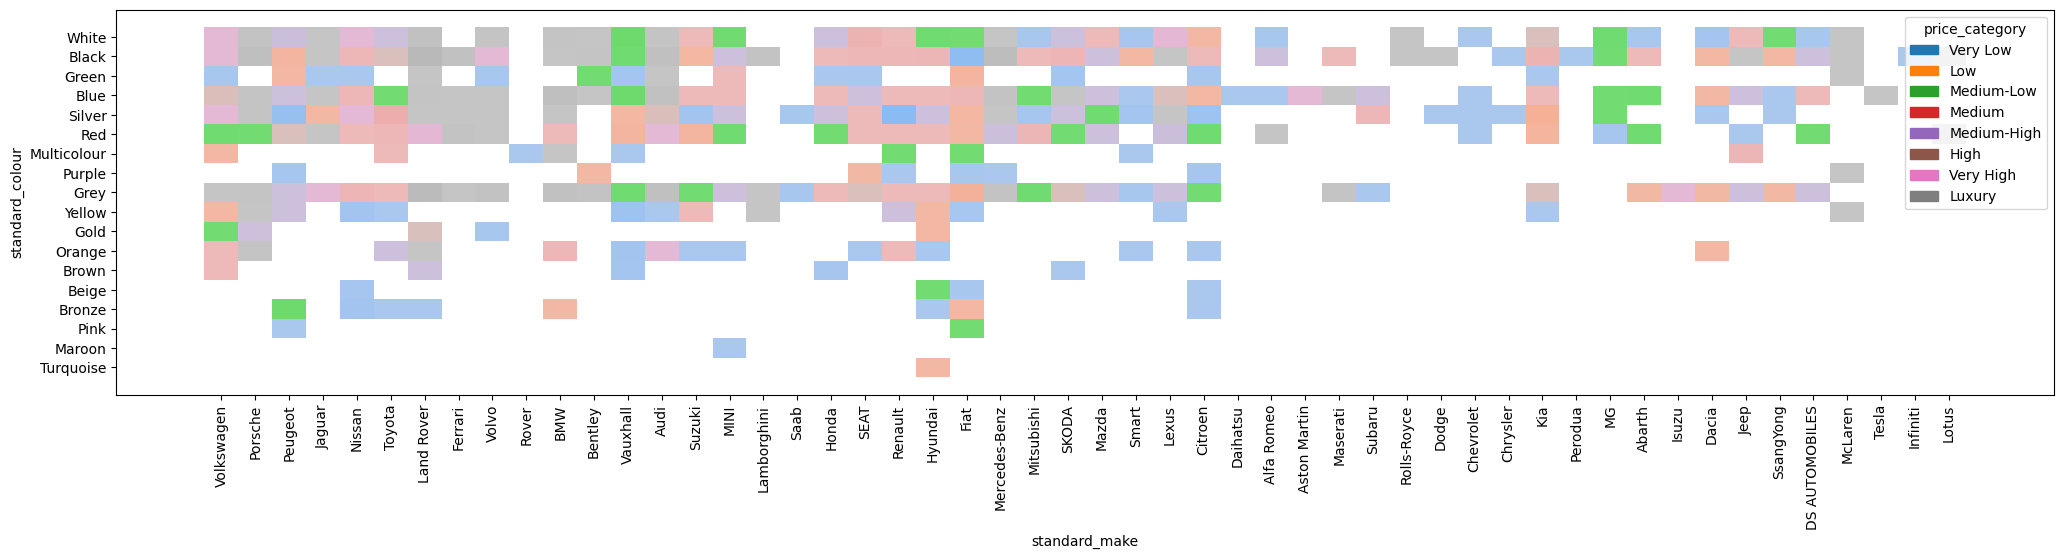

In [106]:
# Histplot in between car model and condition with hue as price category
plt.figure(figsize=(25, 5))
sns.histplot(data=df1, x='standard_make', y='standard_colour', hue='price_category', multiple='stack', legend=True)
plt.xticks(rotation=90)
plt.show()

<b>Observation(s):</b>
* As per the standards by AutoTrader when it comes to classification of `vehicle_condition`, it does have strong association with `price` as there are far more choices in terms of budget for a customer who is interested in buying a vehicle under the tag of USED.
* When it comes to the second bar plot of having `standard_make` on x axis, budget brands such as Volkswagen, Nissan, Toyota, Vauxhall have a higher influence to offer a wide range on different prices, especially in the `Very Low`, `Low`, and `Medium` price ranges.
* In the third plot, different `standard_make` and `standard_colour` combinations shows it's association with difference `price_category` in the dataset. For instance, Land Rover's specific colours like Black and White are priced higher than Bronze, which is situated at the `Very Low` category. So, all brands have cars based on different price categories according to the colour that they sell which is popular in the market.

<b>Recommendation(s):</b>
* Relevant stakeholders can market the vehicle's variable price points already in the database and market these insights in such a way that customer with every budget can buy and sell their dream cars through them at reasonable prices and at a quicker rate. Similarly, it will also attract customers who want to sell their cars because they will know that the chances of getting a customer will be higher if they put their cars up for sale at AutoTrader.
* There are cars of different price categories of some brands which are known to produce cheaper and durable cars like Volkswagen, Nissan, Toyota, BMW, and others. AutoTrader can have a partnership with them to convince that they have a significant customer base and offer them discounts if they purchase new cars of the same brand.  


----------------